In [1]:
import pandas as pd
import numpy as np
import os
import cv2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def create_data(root,sample_num=0):
# root = "./train/"
#     sample_num = 200

    face_files = os.listdir(root)
    df_face_all = []
    for face in face_files:
        './train/angry/'
        cur_path = "%s/%s"%(root,face)
        f_name = os.listdir(cur_path)
        if sample_num != 0:
            f_name = f_name[:sample_num]
        
        f_name = ["%s/%s"%(cur_path,f) for f in f_name]
        df_face = pd.DataFrame()
        df_face['pic_name'] = f_name
        df_face['label'] = face
        df_face_all.append(df_face)
    df_face_all = pd.concat(df_face_all)
    return df_face_all




def single_create_feature_label(path):
    im = cv2.imread(path)
    im = cv2.resize(im,
    (60,60),interpolation=cv2.INTER_CUBIC)
    img_gray = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)
    return img_gray.flatten()





train = create_data("./train/")
val = create_data("./valid/")
test = create_data("./test/")
train.head()

,pic_name,label
0,./train//disgust/45850Exp1heartbroken_worker_4...,disgust
1,./train//disgust/28581Exp1crying_people_726.jpg,disgust
2,./train//disgust/47403Exp1amazed_people_405.jpg,disgust
3,./train//disgust/31850Exp1disgust_actor_506.jpg,disgust
4,./train//disgust/31249Exp1boring_grandmother_1...,disgust


In [3]:
# train = create_data("./train/",3000)
# val = create_data("./valid/",600)
# test = create_data("./test/",600)
train.shape

(92968, 2)

In [4]:
val.head()

,pic_name,label
0,./valid//disgust/6569Exp1fierce_face_372.jpg,disgust
1,./valid//disgust/2693Exp1angry_president_631.jpg,disgust
2,./valid//disgust/6321Exp1fierce_chinese_835.jpg,disgust
3,./valid//disgust/14408Exp1mad_expression_66.jpg,disgust
4,./valid//disgust/14598Exp1mad_girl_52.jpg,disgust


In [5]:
val['pic_name'].tolist()[:5]


['./valid//disgust/6569Exp1fierce_face_372.jpg',
 './valid//disgust/2693Exp1angry_president_631.jpg',
 './valid//disgust/6321Exp1fierce_chinese_835.jpg',
 './valid//disgust/14408Exp1mad_expression_66.jpg',
 './valid//disgust/14598Exp1mad_girl_52.jpg']

In [6]:
def create_feature(df):
    feature_list = []
    df_num = len(df)
    for i,name in enumerate(df['pic_name'].tolist()):
        print("%s/%s"%(i,df_num))
        feat_single = single_create_feature_label(name)
        feature_list.append(feat_single)
    feature_list = pd.DataFrame(feature_list)
    feature_list = feature_list.add_suffix("_feat")
    feature_list['label'] = df['label'].tolist()
    return feature_list

In [7]:
train_new = create_feature(train)
val_new = create_feature(val)
test_new = create_feature(test)


0/92968
1/92968
2/92968
3/92968
4/92968
5/92968
6/92968
7/92968
8/92968
9/92968
10/92968
11/92968
12/92968
13/92968
14/92968
15/92968
16/92968
17/92968
18/92968
19/92968
20/92968
21/92968
22/92968
23/92968
24/92968
25/92968
26/92968
27/92968
28/92968
29/92968
30/92968
31/92968
32/92968
33/92968
34/92968
35/92968
36/92968
37/92968
38/92968
39/92968
40/92968
41/92968
42/92968
43/92968
44/92968
45/92968
46/92968
47/92968
48/92968
49/92968
50/92968
51/92968
52/92968
53/92968
54/92968
55/92968
56/92968
57/92968
58/92968
59/92968
60/92968
61/92968
62/92968
63/92968
64/92968
65/92968
66/92968
67/92968
68/92968
69/92968
70/92968
71/92968
72/92968
73/92968
74/92968
75/92968
76/92968
77/92968
78/92968
79/92968
80/92968
81/92968
82/92968
83/92968
84/92968
85/92968
86/92968
87/92968
88/92968
89/92968
90/92968
91/92968
92/92968
93/92968
94/92968
95/92968
96/92968
97/92968
98/92968
99/92968
100/92968
101/92968
102/92968
103/92968
104/92968
105/92968
106/92968
107/92968
108/92968
109/92968
110/92968


1550/92968
1551/92968
1552/92968
1553/92968
1554/92968
1555/92968
1556/92968
1557/92968
1558/92968
1559/92968
1560/92968
1561/92968
1562/92968
1563/92968
1564/92968
1565/92968
1566/92968
1567/92968
1568/92968
1569/92968
1570/92968
1571/92968
1572/92968
1573/92968
1574/92968
1575/92968
1576/92968
1577/92968
1578/92968
1579/92968
1580/92968
1581/92968
1582/92968
1583/92968
1584/92968
1585/92968
1586/92968
1587/92968
1588/92968
1589/92968
1590/92968
1591/92968
1592/92968
1593/92968
1594/92968
1595/92968
1596/92968
1597/92968
1598/92968
1599/92968
1600/92968
1601/92968
1602/92968
1603/92968
1604/92968
1605/92968
1606/92968
1607/92968
1608/92968
1609/92968
1610/92968
1611/92968
1612/92968
1613/92968
1614/92968
1615/92968
1616/92968
1617/92968
1618/92968
1619/92968
1620/92968
1621/92968
1622/92968
1623/92968
1624/92968
1625/92968
1626/92968
1627/92968
1628/92968
1629/92968
1630/92968
1631/92968
1632/92968
1633/92968
1634/92968
1635/92968
1636/92968
1637/92968
1638/92968
1639/92968
1640/92968

3108/92968
3109/92968
3110/92968
3111/92968
3112/92968
3113/92968
3114/92968
3115/92968
3116/92968
3117/92968
3118/92968
3119/92968
3120/92968
3121/92968
3122/92968
3123/92968
3124/92968
3125/92968
3126/92968
3127/92968
3128/92968
3129/92968
3130/92968
3131/92968
3132/92968
3133/92968
3134/92968
3135/92968
3136/92968
3137/92968
3138/92968
3139/92968
3140/92968
3141/92968
3142/92968
3143/92968
3144/92968
3145/92968
3146/92968
3147/92968
3148/92968
3149/92968
3150/92968
3151/92968
3152/92968
3153/92968
3154/92968
3155/92968
3156/92968
3157/92968
3158/92968
3159/92968
3160/92968
3161/92968
3162/92968
3163/92968
3164/92968
3165/92968
3166/92968
3167/92968
3168/92968
3169/92968
3170/92968
3171/92968
3172/92968
3173/92968
3174/92968
3175/92968
3176/92968
3177/92968
3178/92968
3179/92968
3180/92968
3181/92968
3182/92968
3183/92968
3184/92968
3185/92968
3186/92968
3187/92968
3188/92968
3189/92968
3190/92968
3191/92968
3192/92968
3193/92968
3194/92968
3195/92968
3196/92968
3197/92968
3198/92968

4692/92968
4693/92968
4694/92968
4695/92968
4696/92968
4697/92968
4698/92968
4699/92968
4700/92968
4701/92968
4702/92968
4703/92968
4704/92968
4705/92968
4706/92968
4707/92968
4708/92968
4709/92968
4710/92968
4711/92968
4712/92968
4713/92968
4714/92968
4715/92968
4716/92968
4717/92968
4718/92968
4719/92968
4720/92968
4721/92968
4722/92968
4723/92968
4724/92968
4725/92968
4726/92968
4727/92968
4728/92968
4729/92968
4730/92968
4731/92968
4732/92968
4733/92968
4734/92968
4735/92968
4736/92968
4737/92968
4738/92968
4739/92968
4740/92968
4741/92968
4742/92968
4743/92968
4744/92968
4745/92968
4746/92968
4747/92968
4748/92968
4749/92968
4750/92968
4751/92968
4752/92968
4753/92968
4754/92968
4755/92968
4756/92968
4757/92968
4758/92968
4759/92968
4760/92968
4761/92968
4762/92968
4763/92968
4764/92968
4765/92968
4766/92968
4767/92968
4768/92968
4769/92968
4770/92968
4771/92968
4772/92968
4773/92968
4774/92968
4775/92968
4776/92968
4777/92968
4778/92968
4779/92968
4780/92968
4781/92968
4782/92968

6342/92968
6343/92968
6344/92968
6345/92968
6346/92968
6347/92968
6348/92968
6349/92968
6350/92968
6351/92968
6352/92968
6353/92968
6354/92968
6355/92968
6356/92968
6357/92968
6358/92968
6359/92968
6360/92968
6361/92968
6362/92968
6363/92968
6364/92968
6365/92968
6366/92968
6367/92968
6368/92968
6369/92968
6370/92968
6371/92968
6372/92968
6373/92968
6374/92968
6375/92968
6376/92968
6377/92968
6378/92968
6379/92968
6380/92968
6381/92968
6382/92968
6383/92968
6384/92968
6385/92968
6386/92968
6387/92968
6388/92968
6389/92968
6390/92968
6391/92968
6392/92968
6393/92968
6394/92968
6395/92968
6396/92968
6397/92968
6398/92968
6399/92968
6400/92968
6401/92968
6402/92968
6403/92968
6404/92968
6405/92968
6406/92968
6407/92968
6408/92968
6409/92968
6410/92968
6411/92968
6412/92968
6413/92968
6414/92968
6415/92968
6416/92968
6417/92968
6418/92968
6419/92968
6420/92968
6421/92968
6422/92968
6423/92968
6424/92968
6425/92968
6426/92968
6427/92968
6428/92968
6429/92968
6430/92968
6431/92968
6432/92968

7962/92968
7963/92968
7964/92968
7965/92968
7966/92968
7967/92968
7968/92968
7969/92968
7970/92968
7971/92968
7972/92968
7973/92968
7974/92968
7975/92968
7976/92968
7977/92968
7978/92968
7979/92968
7980/92968
7981/92968
7982/92968
7983/92968
7984/92968
7985/92968
7986/92968
7987/92968
7988/92968
7989/92968
7990/92968
7991/92968
7992/92968
7993/92968
7994/92968
7995/92968
7996/92968
7997/92968
7998/92968
7999/92968
8000/92968
8001/92968
8002/92968
8003/92968
8004/92968
8005/92968
8006/92968
8007/92968
8008/92968
8009/92968
8010/92968
8011/92968
8012/92968
8013/92968
8014/92968
8015/92968
8016/92968
8017/92968
8018/92968
8019/92968
8020/92968
8021/92968
8022/92968
8023/92968
8024/92968
8025/92968
8026/92968
8027/92968
8028/92968
8029/92968
8030/92968
8031/92968
8032/92968
8033/92968
8034/92968
8035/92968
8036/92968
8037/92968
8038/92968
8039/92968
8040/92968
8041/92968
8042/92968
8043/92968
8044/92968
8045/92968
8046/92968
8047/92968
8048/92968
8049/92968
8050/92968
8051/92968
8052/92968

9601/92968
9602/92968
9603/92968
9604/92968
9605/92968
9606/92968
9607/92968
9608/92968
9609/92968
9610/92968
9611/92968
9612/92968
9613/92968
9614/92968
9615/92968
9616/92968
9617/92968
9618/92968
9619/92968
9620/92968
9621/92968
9622/92968
9623/92968
9624/92968
9625/92968
9626/92968
9627/92968
9628/92968
9629/92968
9630/92968
9631/92968
9632/92968
9633/92968
9634/92968
9635/92968
9636/92968
9637/92968
9638/92968
9639/92968
9640/92968
9641/92968
9642/92968
9643/92968
9644/92968
9645/92968
9646/92968
9647/92968
9648/92968
9649/92968
9650/92968
9651/92968
9652/92968
9653/92968
9654/92968
9655/92968
9656/92968
9657/92968
9658/92968
9659/92968
9660/92968
9661/92968
9662/92968
9663/92968
9664/92968
9665/92968
9666/92968
9667/92968
9668/92968
9669/92968
9670/92968
9671/92968
9672/92968
9673/92968
9674/92968
9675/92968
9676/92968
9677/92968
9678/92968
9679/92968
9680/92968
9681/92968
9682/92968
9683/92968
9684/92968
9685/92968
9686/92968
9687/92968
9688/92968
9689/92968
9690/92968
9691/92968

11163/92968
11164/92968
11165/92968
11166/92968
11167/92968
11168/92968
11169/92968
11170/92968
11171/92968
11172/92968
11173/92968
11174/92968
11175/92968
11176/92968
11177/92968
11178/92968
11179/92968
11180/92968
11181/92968
11182/92968
11183/92968
11184/92968
11185/92968
11186/92968
11187/92968
11188/92968
11189/92968
11190/92968
11191/92968
11192/92968
11193/92968
11194/92968
11195/92968
11196/92968
11197/92968
11198/92968
11199/92968
11200/92968
11201/92968
11202/92968
11203/92968
11204/92968
11205/92968
11206/92968
11207/92968
11208/92968
11209/92968
11210/92968
11211/92968
11212/92968
11213/92968
11214/92968
11215/92968
11216/92968
11217/92968
11218/92968
11219/92968
11220/92968
11221/92968
11222/92968
11223/92968
11224/92968
11225/92968
11226/92968
11227/92968
11228/92968
11229/92968
11230/92968
11231/92968
11232/92968
11233/92968
11234/92968
11235/92968
11236/92968
11237/92968
11238/92968
11239/92968
11240/92968
11241/92968
11242/92968
11243/92968
11244/92968
11245/92968
1124

12782/92968
12783/92968
12784/92968
12785/92968
12786/92968
12787/92968
12788/92968
12789/92968
12790/92968
12791/92968
12792/92968
12793/92968
12794/92968
12795/92968
12796/92968
12797/92968
12798/92968
12799/92968
12800/92968
12801/92968
12802/92968
12803/92968
12804/92968
12805/92968
12806/92968
12807/92968
12808/92968
12809/92968
12810/92968
12811/92968
12812/92968
12813/92968
12814/92968
12815/92968
12816/92968
12817/92968
12818/92968
12819/92968
12820/92968
12821/92968
12822/92968
12823/92968
12824/92968
12825/92968
12826/92968
12827/92968
12828/92968
12829/92968
12830/92968
12831/92968
12832/92968
12833/92968
12834/92968
12835/92968
12836/92968
12837/92968
12838/92968
12839/92968
12840/92968
12841/92968
12842/92968
12843/92968
12844/92968
12845/92968
12846/92968
12847/92968
12848/92968
12849/92968
12850/92968
12851/92968
12852/92968
12853/92968
12854/92968
12855/92968
12856/92968
12857/92968
12858/92968
12859/92968
12860/92968
12861/92968
12862/92968
12863/92968
12864/92968
1286

14362/92968
14363/92968
14364/92968
14365/92968
14366/92968
14367/92968
14368/92968
14369/92968
14370/92968
14371/92968
14372/92968
14373/92968
14374/92968
14375/92968
14376/92968
14377/92968
14378/92968
14379/92968
14380/92968
14381/92968
14382/92968
14383/92968
14384/92968
14385/92968
14386/92968
14387/92968
14388/92968
14389/92968
14390/92968
14391/92968
14392/92968
14393/92968
14394/92968
14395/92968
14396/92968
14397/92968
14398/92968
14399/92968
14400/92968
14401/92968
14402/92968
14403/92968
14404/92968
14405/92968
14406/92968
14407/92968
14408/92968
14409/92968
14410/92968
14411/92968
14412/92968
14413/92968
14414/92968
14415/92968
14416/92968
14417/92968
14418/92968
14419/92968
14420/92968
14421/92968
14422/92968
14423/92968
14424/92968
14425/92968
14426/92968
14427/92968
14428/92968
14429/92968
14430/92968
14431/92968
14432/92968
14433/92968
14434/92968
14435/92968
14436/92968
14437/92968
14438/92968
14439/92968
14440/92968
14441/92968
14442/92968
14443/92968
14444/92968
1444

15874/92968
15875/92968
15876/92968
15877/92968
15878/92968
15879/92968
15880/92968
15881/92968
15882/92968
15883/92968
15884/92968
15885/92968
15886/92968
15887/92968
15888/92968
15889/92968
15890/92968
15891/92968
15892/92968
15893/92968
15894/92968
15895/92968
15896/92968
15897/92968
15898/92968
15899/92968
15900/92968
15901/92968
15902/92968
15903/92968
15904/92968
15905/92968
15906/92968
15907/92968
15908/92968
15909/92968
15910/92968
15911/92968
15912/92968
15913/92968
15914/92968
15915/92968
15916/92968
15917/92968
15918/92968
15919/92968
15920/92968
15921/92968
15922/92968
15923/92968
15924/92968
15925/92968
15926/92968
15927/92968
15928/92968
15929/92968
15930/92968
15931/92968
15932/92968
15933/92968
15934/92968
15935/92968
15936/92968
15937/92968
15938/92968
15939/92968
15940/92968
15941/92968
15942/92968
15943/92968
15944/92968
15945/92968
15946/92968
15947/92968
15948/92968
15949/92968
15950/92968
15951/92968
15952/92968
15953/92968
15954/92968
15955/92968
15956/92968
1595

17457/92968
17458/92968
17459/92968
17460/92968
17461/92968
17462/92968
17463/92968
17464/92968
17465/92968
17466/92968
17467/92968
17468/92968
17469/92968
17470/92968
17471/92968
17472/92968
17473/92968
17474/92968
17475/92968
17476/92968
17477/92968
17478/92968
17479/92968
17480/92968
17481/92968
17482/92968
17483/92968
17484/92968
17485/92968
17486/92968
17487/92968
17488/92968
17489/92968
17490/92968
17491/92968
17492/92968
17493/92968
17494/92968
17495/92968
17496/92968
17497/92968
17498/92968
17499/92968
17500/92968
17501/92968
17502/92968
17503/92968
17504/92968
17505/92968
17506/92968
17507/92968
17508/92968
17509/92968
17510/92968
17511/92968
17512/92968
17513/92968
17514/92968
17515/92968
17516/92968
17517/92968
17518/92968
17519/92968
17520/92968
17521/92968
17522/92968
17523/92968
17524/92968
17525/92968
17526/92968
17527/92968
17528/92968
17529/92968
17530/92968
17531/92968
17532/92968
17533/92968
17534/92968
17535/92968
17536/92968
17537/92968
17538/92968
17539/92968
1754

19027/92968
19028/92968
19029/92968
19030/92968
19031/92968
19032/92968
19033/92968
19034/92968
19035/92968
19036/92968
19037/92968
19038/92968
19039/92968
19040/92968
19041/92968
19042/92968
19043/92968
19044/92968
19045/92968
19046/92968
19047/92968
19048/92968
19049/92968
19050/92968
19051/92968
19052/92968
19053/92968
19054/92968
19055/92968
19056/92968
19057/92968
19058/92968
19059/92968
19060/92968
19061/92968
19062/92968
19063/92968
19064/92968
19065/92968
19066/92968
19067/92968
19068/92968
19069/92968
19070/92968
19071/92968
19072/92968
19073/92968
19074/92968
19075/92968
19076/92968
19077/92968
19078/92968
19079/92968
19080/92968
19081/92968
19082/92968
19083/92968
19084/92968
19085/92968
19086/92968
19087/92968
19088/92968
19089/92968
19090/92968
19091/92968
19092/92968
19093/92968
19094/92968
19095/92968
19096/92968
19097/92968
19098/92968
19099/92968
19100/92968
19101/92968
19102/92968
19103/92968
19104/92968
19105/92968
19106/92968
19107/92968
19108/92968
19109/92968
1911

20573/92968
20574/92968
20575/92968
20576/92968
20577/92968
20578/92968
20579/92968
20580/92968
20581/92968
20582/92968
20583/92968
20584/92968
20585/92968
20586/92968
20587/92968
20588/92968
20589/92968
20590/92968
20591/92968
20592/92968
20593/92968
20594/92968
20595/92968
20596/92968
20597/92968
20598/92968
20599/92968
20600/92968
20601/92968
20602/92968
20603/92968
20604/92968
20605/92968
20606/92968
20607/92968
20608/92968
20609/92968
20610/92968
20611/92968
20612/92968
20613/92968
20614/92968
20615/92968
20616/92968
20617/92968
20618/92968
20619/92968
20620/92968
20621/92968
20622/92968
20623/92968
20624/92968
20625/92968
20626/92968
20627/92968
20628/92968
20629/92968
20630/92968
20631/92968
20632/92968
20633/92968
20634/92968
20635/92968
20636/92968
20637/92968
20638/92968
20639/92968
20640/92968
20641/92968
20642/92968
20643/92968
20644/92968
20645/92968
20646/92968
20647/92968
20648/92968
20649/92968
20650/92968
20651/92968
20652/92968
20653/92968
20654/92968
20655/92968
2065

22207/92968
22208/92968
22209/92968
22210/92968
22211/92968
22212/92968
22213/92968
22214/92968
22215/92968
22216/92968
22217/92968
22218/92968
22219/92968
22220/92968
22221/92968
22222/92968
22223/92968
22224/92968
22225/92968
22226/92968
22227/92968
22228/92968
22229/92968
22230/92968
22231/92968
22232/92968
22233/92968
22234/92968
22235/92968
22236/92968
22237/92968
22238/92968
22239/92968
22240/92968
22241/92968
22242/92968
22243/92968
22244/92968
22245/92968
22246/92968
22247/92968
22248/92968
22249/92968
22250/92968
22251/92968
22252/92968
22253/92968
22254/92968
22255/92968
22256/92968
22257/92968
22258/92968
22259/92968
22260/92968
22261/92968
22262/92968
22263/92968
22264/92968
22265/92968
22266/92968
22267/92968
22268/92968
22269/92968
22270/92968
22271/92968
22272/92968
22273/92968
22274/92968
22275/92968
22276/92968
22277/92968
22278/92968
22279/92968
22280/92968
22281/92968
22282/92968
22283/92968
22284/92968
22285/92968
22286/92968
22287/92968
22288/92968
22289/92968
2229

23842/92968
23843/92968
23844/92968
23845/92968
23846/92968
23847/92968
23848/92968
23849/92968
23850/92968
23851/92968
23852/92968
23853/92968
23854/92968
23855/92968
23856/92968
23857/92968
23858/92968
23859/92968
23860/92968
23861/92968
23862/92968
23863/92968
23864/92968
23865/92968
23866/92968
23867/92968
23868/92968
23869/92968
23870/92968
23871/92968
23872/92968
23873/92968
23874/92968
23875/92968
23876/92968
23877/92968
23878/92968
23879/92968
23880/92968
23881/92968
23882/92968
23883/92968
23884/92968
23885/92968
23886/92968
23887/92968
23888/92968
23889/92968
23890/92968
23891/92968
23892/92968
23893/92968
23894/92968
23895/92968
23896/92968
23897/92968
23898/92968
23899/92968
23900/92968
23901/92968
23902/92968
23903/92968
23904/92968
23905/92968
23906/92968
23907/92968
23908/92968
23909/92968
23910/92968
23911/92968
23912/92968
23913/92968
23914/92968
23915/92968
23916/92968
23917/92968
23918/92968
23919/92968
23920/92968
23921/92968
23922/92968
23923/92968
23924/92968
2392

25418/92968
25419/92968
25420/92968
25421/92968
25422/92968
25423/92968
25424/92968
25425/92968
25426/92968
25427/92968
25428/92968
25429/92968
25430/92968
25431/92968
25432/92968
25433/92968
25434/92968
25435/92968
25436/92968
25437/92968
25438/92968
25439/92968
25440/92968
25441/92968
25442/92968
25443/92968
25444/92968
25445/92968
25446/92968
25447/92968
25448/92968
25449/92968
25450/92968
25451/92968
25452/92968
25453/92968
25454/92968
25455/92968
25456/92968
25457/92968
25458/92968
25459/92968
25460/92968
25461/92968
25462/92968
25463/92968
25464/92968
25465/92968
25466/92968
25467/92968
25468/92968
25469/92968
25470/92968
25471/92968
25472/92968
25473/92968
25474/92968
25475/92968
25476/92968
25477/92968
25478/92968
25479/92968
25480/92968
25481/92968
25482/92968
25483/92968
25484/92968
25485/92968
25486/92968
25487/92968
25488/92968
25489/92968
25490/92968
25491/92968
25492/92968
25493/92968
25494/92968
25495/92968
25496/92968
25497/92968
25498/92968
25499/92968
25500/92968
2550

27045/92968
27046/92968
27047/92968
27048/92968
27049/92968
27050/92968
27051/92968
27052/92968
27053/92968
27054/92968
27055/92968
27056/92968
27057/92968
27058/92968
27059/92968
27060/92968
27061/92968
27062/92968
27063/92968
27064/92968
27065/92968
27066/92968
27067/92968
27068/92968
27069/92968
27070/92968
27071/92968
27072/92968
27073/92968
27074/92968
27075/92968
27076/92968
27077/92968
27078/92968
27079/92968
27080/92968
27081/92968
27082/92968
27083/92968
27084/92968
27085/92968
27086/92968
27087/92968
27088/92968
27089/92968
27090/92968
27091/92968
27092/92968
27093/92968
27094/92968
27095/92968
27096/92968
27097/92968
27098/92968
27099/92968
27100/92968
27101/92968
27102/92968
27103/92968
27104/92968
27105/92968
27106/92968
27107/92968
27108/92968
27109/92968
27110/92968
27111/92968
27112/92968
27113/92968
27114/92968
27115/92968
27116/92968
27117/92968
27118/92968
27119/92968
27120/92968
27121/92968
27122/92968
27123/92968
27124/92968
27125/92968
27126/92968
27127/92968
2712

28598/92968
28599/92968
28600/92968
28601/92968
28602/92968
28603/92968
28604/92968
28605/92968
28606/92968
28607/92968
28608/92968
28609/92968
28610/92968
28611/92968
28612/92968
28613/92968
28614/92968
28615/92968
28616/92968
28617/92968
28618/92968
28619/92968
28620/92968
28621/92968
28622/92968
28623/92968
28624/92968
28625/92968
28626/92968
28627/92968
28628/92968
28629/92968
28630/92968
28631/92968
28632/92968
28633/92968
28634/92968
28635/92968
28636/92968
28637/92968
28638/92968
28639/92968
28640/92968
28641/92968
28642/92968
28643/92968
28644/92968
28645/92968
28646/92968
28647/92968
28648/92968
28649/92968
28650/92968
28651/92968
28652/92968
28653/92968
28654/92968
28655/92968
28656/92968
28657/92968
28658/92968
28659/92968
28660/92968
28661/92968
28662/92968
28663/92968
28664/92968
28665/92968
28666/92968
28667/92968
28668/92968
28669/92968
28670/92968
28671/92968
28672/92968
28673/92968
28674/92968
28675/92968
28676/92968
28677/92968
28678/92968
28679/92968
28680/92968
2868

30173/92968
30174/92968
30175/92968
30176/92968
30177/92968
30178/92968
30179/92968
30180/92968
30181/92968
30182/92968
30183/92968
30184/92968
30185/92968
30186/92968
30187/92968
30188/92968
30189/92968
30190/92968
30191/92968
30192/92968
30193/92968
30194/92968
30195/92968
30196/92968
30197/92968
30198/92968
30199/92968
30200/92968
30201/92968
30202/92968
30203/92968
30204/92968
30205/92968
30206/92968
30207/92968
30208/92968
30209/92968
30210/92968
30211/92968
30212/92968
30213/92968
30214/92968
30215/92968
30216/92968
30217/92968
30218/92968
30219/92968
30220/92968
30221/92968
30222/92968
30223/92968
30224/92968
30225/92968
30226/92968
30227/92968
30228/92968
30229/92968
30230/92968
30231/92968
30232/92968
30233/92968
30234/92968
30235/92968
30236/92968
30237/92968
30238/92968
30239/92968
30240/92968
30241/92968
30242/92968
30243/92968
30244/92968
30245/92968
30246/92968
30247/92968
30248/92968
30249/92968
30250/92968
30251/92968
30252/92968
30253/92968
30254/92968
30255/92968
3025

31697/92968
31698/92968
31699/92968
31700/92968
31701/92968
31702/92968
31703/92968
31704/92968
31705/92968
31706/92968
31707/92968
31708/92968
31709/92968
31710/92968
31711/92968
31712/92968
31713/92968
31714/92968
31715/92968
31716/92968
31717/92968
31718/92968
31719/92968
31720/92968
31721/92968
31722/92968
31723/92968
31724/92968
31725/92968
31726/92968
31727/92968
31728/92968
31729/92968
31730/92968
31731/92968
31732/92968
31733/92968
31734/92968
31735/92968
31736/92968
31737/92968
31738/92968
31739/92968
31740/92968
31741/92968
31742/92968
31743/92968
31744/92968
31745/92968
31746/92968
31747/92968
31748/92968
31749/92968
31750/92968
31751/92968
31752/92968
31753/92968
31754/92968
31755/92968
31756/92968
31757/92968
31758/92968
31759/92968
31760/92968
31761/92968
31762/92968
31763/92968
31764/92968
31765/92968
31766/92968
31767/92968
31768/92968
31769/92968
31770/92968
31771/92968
31772/92968
31773/92968
31774/92968
31775/92968
31776/92968
31777/92968
31778/92968
31779/92968
3178

33267/92968
33268/92968
33269/92968
33270/92968
33271/92968
33272/92968
33273/92968
33274/92968
33275/92968
33276/92968
33277/92968
33278/92968
33279/92968
33280/92968
33281/92968
33282/92968
33283/92968
33284/92968
33285/92968
33286/92968
33287/92968
33288/92968
33289/92968
33290/92968
33291/92968
33292/92968
33293/92968
33294/92968
33295/92968
33296/92968
33297/92968
33298/92968
33299/92968
33300/92968
33301/92968
33302/92968
33303/92968
33304/92968
33305/92968
33306/92968
33307/92968
33308/92968
33309/92968
33310/92968
33311/92968
33312/92968
33313/92968
33314/92968
33315/92968
33316/92968
33317/92968
33318/92968
33319/92968
33320/92968
33321/92968
33322/92968
33323/92968
33324/92968
33325/92968
33326/92968
33327/92968
33328/92968
33329/92968
33330/92968
33331/92968
33332/92968
33333/92968
33334/92968
33335/92968
33336/92968
33337/92968
33338/92968
33339/92968
33340/92968
33341/92968
33342/92968
33343/92968
33344/92968
33345/92968
33346/92968
33347/92968
33348/92968
33349/92968
3335

34859/92968
34860/92968
34861/92968
34862/92968
34863/92968
34864/92968
34865/92968
34866/92968
34867/92968
34868/92968
34869/92968
34870/92968
34871/92968
34872/92968
34873/92968
34874/92968
34875/92968
34876/92968
34877/92968
34878/92968
34879/92968
34880/92968
34881/92968
34882/92968
34883/92968
34884/92968
34885/92968
34886/92968
34887/92968
34888/92968
34889/92968
34890/92968
34891/92968
34892/92968
34893/92968
34894/92968
34895/92968
34896/92968
34897/92968
34898/92968
34899/92968
34900/92968
34901/92968
34902/92968
34903/92968
34904/92968
34905/92968
34906/92968
34907/92968
34908/92968
34909/92968
34910/92968
34911/92968
34912/92968
34913/92968
34914/92968
34915/92968
34916/92968
34917/92968
34918/92968
34919/92968
34920/92968
34921/92968
34922/92968
34923/92968
34924/92968
34925/92968
34926/92968
34927/92968
34928/92968
34929/92968
34930/92968
34931/92968
34932/92968
34933/92968
34934/92968
34935/92968
34936/92968
34937/92968
34938/92968
34939/92968
34940/92968
34941/92968
3494

36445/92968
36446/92968
36447/92968
36448/92968
36449/92968
36450/92968
36451/92968
36452/92968
36453/92968
36454/92968
36455/92968
36456/92968
36457/92968
36458/92968
36459/92968
36460/92968
36461/92968
36462/92968
36463/92968
36464/92968
36465/92968
36466/92968
36467/92968
36468/92968
36469/92968
36470/92968
36471/92968
36472/92968
36473/92968
36474/92968
36475/92968
36476/92968
36477/92968
36478/92968
36479/92968
36480/92968
36481/92968
36482/92968
36483/92968
36484/92968
36485/92968
36486/92968
36487/92968
36488/92968
36489/92968
36490/92968
36491/92968
36492/92968
36493/92968
36494/92968
36495/92968
36496/92968
36497/92968
36498/92968
36499/92968
36500/92968
36501/92968
36502/92968
36503/92968
36504/92968
36505/92968
36506/92968
36507/92968
36508/92968
36509/92968
36510/92968
36511/92968
36512/92968
36513/92968
36514/92968
36515/92968
36516/92968
36517/92968
36518/92968
36519/92968
36520/92968
36521/92968
36522/92968
36523/92968
36524/92968
36525/92968
36526/92968
36527/92968
3652

38003/92968
38004/92968
38005/92968
38006/92968
38007/92968
38008/92968
38009/92968
38010/92968
38011/92968
38012/92968
38013/92968
38014/92968
38015/92968
38016/92968
38017/92968
38018/92968
38019/92968
38020/92968
38021/92968
38022/92968
38023/92968
38024/92968
38025/92968
38026/92968
38027/92968
38028/92968
38029/92968
38030/92968
38031/92968
38032/92968
38033/92968
38034/92968
38035/92968
38036/92968
38037/92968
38038/92968
38039/92968
38040/92968
38041/92968
38042/92968
38043/92968
38044/92968
38045/92968
38046/92968
38047/92968
38048/92968
38049/92968
38050/92968
38051/92968
38052/92968
38053/92968
38054/92968
38055/92968
38056/92968
38057/92968
38058/92968
38059/92968
38060/92968
38061/92968
38062/92968
38063/92968
38064/92968
38065/92968
38066/92968
38067/92968
38068/92968
38069/92968
38070/92968
38071/92968
38072/92968
38073/92968
38074/92968
38075/92968
38076/92968
38077/92968
38078/92968
38079/92968
38080/92968
38081/92968
38082/92968
38083/92968
38084/92968
38085/92968
3808

39625/92968
39626/92968
39627/92968
39628/92968
39629/92968
39630/92968
39631/92968
39632/92968
39633/92968
39634/92968
39635/92968
39636/92968
39637/92968
39638/92968
39639/92968
39640/92968
39641/92968
39642/92968
39643/92968
39644/92968
39645/92968
39646/92968
39647/92968
39648/92968
39649/92968
39650/92968
39651/92968
39652/92968
39653/92968
39654/92968
39655/92968
39656/92968
39657/92968
39658/92968
39659/92968
39660/92968
39661/92968
39662/92968
39663/92968
39664/92968
39665/92968
39666/92968
39667/92968
39668/92968
39669/92968
39670/92968
39671/92968
39672/92968
39673/92968
39674/92968
39675/92968
39676/92968
39677/92968
39678/92968
39679/92968
39680/92968
39681/92968
39682/92968
39683/92968
39684/92968
39685/92968
39686/92968
39687/92968
39688/92968
39689/92968
39690/92968
39691/92968
39692/92968
39693/92968
39694/92968
39695/92968
39696/92968
39697/92968
39698/92968
39699/92968
39700/92968
39701/92968
39702/92968
39703/92968
39704/92968
39705/92968
39706/92968
39707/92968
3970

41268/92968
41269/92968
41270/92968
41271/92968
41272/92968
41273/92968
41274/92968
41275/92968
41276/92968
41277/92968
41278/92968
41279/92968
41280/92968
41281/92968
41282/92968
41283/92968
41284/92968
41285/92968
41286/92968
41287/92968
41288/92968
41289/92968
41290/92968
41291/92968
41292/92968
41293/92968
41294/92968
41295/92968
41296/92968
41297/92968
41298/92968
41299/92968
41300/92968
41301/92968
41302/92968
41303/92968
41304/92968
41305/92968
41306/92968
41307/92968
41308/92968
41309/92968
41310/92968
41311/92968
41312/92968
41313/92968
41314/92968
41315/92968
41316/92968
41317/92968
41318/92968
41319/92968
41320/92968
41321/92968
41322/92968
41323/92968
41324/92968
41325/92968
41326/92968
41327/92968
41328/92968
41329/92968
41330/92968
41331/92968
41332/92968
41333/92968
41334/92968
41335/92968
41336/92968
41337/92968
41338/92968
41339/92968
41340/92968
41341/92968
41342/92968
41343/92968
41344/92968
41345/92968
41346/92968
41347/92968
41348/92968
41349/92968
41350/92968
4135

42858/92968
42859/92968
42860/92968
42861/92968
42862/92968
42863/92968
42864/92968
42865/92968
42866/92968
42867/92968
42868/92968
42869/92968
42870/92968
42871/92968
42872/92968
42873/92968
42874/92968
42875/92968
42876/92968
42877/92968
42878/92968
42879/92968
42880/92968
42881/92968
42882/92968
42883/92968
42884/92968
42885/92968
42886/92968
42887/92968
42888/92968
42889/92968
42890/92968
42891/92968
42892/92968
42893/92968
42894/92968
42895/92968
42896/92968
42897/92968
42898/92968
42899/92968
42900/92968
42901/92968
42902/92968
42903/92968
42904/92968
42905/92968
42906/92968
42907/92968
42908/92968
42909/92968
42910/92968
42911/92968
42912/92968
42913/92968
42914/92968
42915/92968
42916/92968
42917/92968
42918/92968
42919/92968
42920/92968
42921/92968
42922/92968
42923/92968
42924/92968
42925/92968
42926/92968
42927/92968
42928/92968
42929/92968
42930/92968
42931/92968
42932/92968
42933/92968
42934/92968
42935/92968
42936/92968
42937/92968
42938/92968
42939/92968
42940/92968
4294

44497/92968
44498/92968
44499/92968
44500/92968
44501/92968
44502/92968
44503/92968
44504/92968
44505/92968
44506/92968
44507/92968
44508/92968
44509/92968
44510/92968
44511/92968
44512/92968
44513/92968
44514/92968
44515/92968
44516/92968
44517/92968
44518/92968
44519/92968
44520/92968
44521/92968
44522/92968
44523/92968
44524/92968
44525/92968
44526/92968
44527/92968
44528/92968
44529/92968
44530/92968
44531/92968
44532/92968
44533/92968
44534/92968
44535/92968
44536/92968
44537/92968
44538/92968
44539/92968
44540/92968
44541/92968
44542/92968
44543/92968
44544/92968
44545/92968
44546/92968
44547/92968
44548/92968
44549/92968
44550/92968
44551/92968
44552/92968
44553/92968
44554/92968
44555/92968
44556/92968
44557/92968
44558/92968
44559/92968
44560/92968
44561/92968
44562/92968
44563/92968
44564/92968
44565/92968
44566/92968
44567/92968
44568/92968
44569/92968
44570/92968
44571/92968
44572/92968
44573/92968
44574/92968
44575/92968
44576/92968
44577/92968
44578/92968
44579/92968
4458

46153/92968
46154/92968
46155/92968
46156/92968
46157/92968
46158/92968
46159/92968
46160/92968
46161/92968
46162/92968
46163/92968
46164/92968
46165/92968
46166/92968
46167/92968
46168/92968
46169/92968
46170/92968
46171/92968
46172/92968
46173/92968
46174/92968
46175/92968
46176/92968
46177/92968
46178/92968
46179/92968
46180/92968
46181/92968
46182/92968
46183/92968
46184/92968
46185/92968
46186/92968
46187/92968
46188/92968
46189/92968
46190/92968
46191/92968
46192/92968
46193/92968
46194/92968
46195/92968
46196/92968
46197/92968
46198/92968
46199/92968
46200/92968
46201/92968
46202/92968
46203/92968
46204/92968
46205/92968
46206/92968
46207/92968
46208/92968
46209/92968
46210/92968
46211/92968
46212/92968
46213/92968
46214/92968
46215/92968
46216/92968
46217/92968
46218/92968
46219/92968
46220/92968
46221/92968
46222/92968
46223/92968
46224/92968
46225/92968
46226/92968
46227/92968
46228/92968
46229/92968
46230/92968
46231/92968
46232/92968
46233/92968
46234/92968
46235/92968
4623

47739/92968
47740/92968
47741/92968
47742/92968
47743/92968
47744/92968
47745/92968
47746/92968
47747/92968
47748/92968
47749/92968
47750/92968
47751/92968
47752/92968
47753/92968
47754/92968
47755/92968
47756/92968
47757/92968
47758/92968
47759/92968
47760/92968
47761/92968
47762/92968
47763/92968
47764/92968
47765/92968
47766/92968
47767/92968
47768/92968
47769/92968
47770/92968
47771/92968
47772/92968
47773/92968
47774/92968
47775/92968
47776/92968
47777/92968
47778/92968
47779/92968
47780/92968
47781/92968
47782/92968
47783/92968
47784/92968
47785/92968
47786/92968
47787/92968
47788/92968
47789/92968
47790/92968
47791/92968
47792/92968
47793/92968
47794/92968
47795/92968
47796/92968
47797/92968
47798/92968
47799/92968
47800/92968
47801/92968
47802/92968
47803/92968
47804/92968
47805/92968
47806/92968
47807/92968
47808/92968
47809/92968
47810/92968
47811/92968
47812/92968
47813/92968
47814/92968
47815/92968
47816/92968
47817/92968
47818/92968
47819/92968
47820/92968
47821/92968
4782

49386/92968
49387/92968
49388/92968
49389/92968
49390/92968
49391/92968
49392/92968
49393/92968
49394/92968
49395/92968
49396/92968
49397/92968
49398/92968
49399/92968
49400/92968
49401/92968
49402/92968
49403/92968
49404/92968
49405/92968
49406/92968
49407/92968
49408/92968
49409/92968
49410/92968
49411/92968
49412/92968
49413/92968
49414/92968
49415/92968
49416/92968
49417/92968
49418/92968
49419/92968
49420/92968
49421/92968
49422/92968
49423/92968
49424/92968
49425/92968
49426/92968
49427/92968
49428/92968
49429/92968
49430/92968
49431/92968
49432/92968
49433/92968
49434/92968
49435/92968
49436/92968
49437/92968
49438/92968
49439/92968
49440/92968
49441/92968
49442/92968
49443/92968
49444/92968
49445/92968
49446/92968
49447/92968
49448/92968
49449/92968
49450/92968
49451/92968
49452/92968
49453/92968
49454/92968
49455/92968
49456/92968
49457/92968
49458/92968
49459/92968
49460/92968
49461/92968
49462/92968
49463/92968
49464/92968
49465/92968
49466/92968
49467/92968
49468/92968
4946

51082/92968
51083/92968
51084/92968
51085/92968
51086/92968
51087/92968
51088/92968
51089/92968
51090/92968
51091/92968
51092/92968
51093/92968
51094/92968
51095/92968
51096/92968
51097/92968
51098/92968
51099/92968
51100/92968
51101/92968
51102/92968
51103/92968
51104/92968
51105/92968
51106/92968
51107/92968
51108/92968
51109/92968
51110/92968
51111/92968
51112/92968
51113/92968
51114/92968
51115/92968
51116/92968
51117/92968
51118/92968
51119/92968
51120/92968
51121/92968
51122/92968
51123/92968
51124/92968
51125/92968
51126/92968
51127/92968
51128/92968
51129/92968
51130/92968
51131/92968
51132/92968
51133/92968
51134/92968
51135/92968
51136/92968
51137/92968
51138/92968
51139/92968
51140/92968
51141/92968
51142/92968
51143/92968
51144/92968
51145/92968
51146/92968
51147/92968
51148/92968
51149/92968
51150/92968
51151/92968
51152/92968
51153/92968
51154/92968
51155/92968
51156/92968
51157/92968
51158/92968
51159/92968
51160/92968
51161/92968
51162/92968
51163/92968
51164/92968
5116

52686/92968
52687/92968
52688/92968
52689/92968
52690/92968
52691/92968
52692/92968
52693/92968
52694/92968
52695/92968
52696/92968
52697/92968
52698/92968
52699/92968
52700/92968
52701/92968
52702/92968
52703/92968
52704/92968
52705/92968
52706/92968
52707/92968
52708/92968
52709/92968
52710/92968
52711/92968
52712/92968
52713/92968
52714/92968
52715/92968
52716/92968
52717/92968
52718/92968
52719/92968
52720/92968
52721/92968
52722/92968
52723/92968
52724/92968
52725/92968
52726/92968
52727/92968
52728/92968
52729/92968
52730/92968
52731/92968
52732/92968
52733/92968
52734/92968
52735/92968
52736/92968
52737/92968
52738/92968
52739/92968
52740/92968
52741/92968
52742/92968
52743/92968
52744/92968
52745/92968
52746/92968
52747/92968
52748/92968
52749/92968
52750/92968
52751/92968
52752/92968
52753/92968
52754/92968
52755/92968
52756/92968
52757/92968
52758/92968
52759/92968
52760/92968
52761/92968
52762/92968
52763/92968
52764/92968
52765/92968
52766/92968
52767/92968
52768/92968
5276

54242/92968
54243/92968
54244/92968
54245/92968
54246/92968
54247/92968
54248/92968
54249/92968
54250/92968
54251/92968
54252/92968
54253/92968
54254/92968
54255/92968
54256/92968
54257/92968
54258/92968
54259/92968
54260/92968
54261/92968
54262/92968
54263/92968
54264/92968
54265/92968
54266/92968
54267/92968
54268/92968
54269/92968
54270/92968
54271/92968
54272/92968
54273/92968
54274/92968
54275/92968
54276/92968
54277/92968
54278/92968
54279/92968
54280/92968
54281/92968
54282/92968
54283/92968
54284/92968
54285/92968
54286/92968
54287/92968
54288/92968
54289/92968
54290/92968
54291/92968
54292/92968
54293/92968
54294/92968
54295/92968
54296/92968
54297/92968
54298/92968
54299/92968
54300/92968
54301/92968
54302/92968
54303/92968
54304/92968
54305/92968
54306/92968
54307/92968
54308/92968
54309/92968
54310/92968
54311/92968
54312/92968
54313/92968
54314/92968
54315/92968
54316/92968
54317/92968
54318/92968
54319/92968
54320/92968
54321/92968
54322/92968
54323/92968
54324/92968
5432

55762/92968
55763/92968
55764/92968
55765/92968
55766/92968
55767/92968
55768/92968
55769/92968
55770/92968
55771/92968
55772/92968
55773/92968
55774/92968
55775/92968
55776/92968
55777/92968
55778/92968
55779/92968
55780/92968
55781/92968
55782/92968
55783/92968
55784/92968
55785/92968
55786/92968
55787/92968
55788/92968
55789/92968
55790/92968
55791/92968
55792/92968
55793/92968
55794/92968
55795/92968
55796/92968
55797/92968
55798/92968
55799/92968
55800/92968
55801/92968
55802/92968
55803/92968
55804/92968
55805/92968
55806/92968
55807/92968
55808/92968
55809/92968
55810/92968
55811/92968
55812/92968
55813/92968
55814/92968
55815/92968
55816/92968
55817/92968
55818/92968
55819/92968
55820/92968
55821/92968
55822/92968
55823/92968
55824/92968
55825/92968
55826/92968
55827/92968
55828/92968
55829/92968
55830/92968
55831/92968
55832/92968
55833/92968
55834/92968
55835/92968
55836/92968
55837/92968
55838/92968
55839/92968
55840/92968
55841/92968
55842/92968
55843/92968
55844/92968
5584

57382/92968
57383/92968
57384/92968
57385/92968
57386/92968
57387/92968
57388/92968
57389/92968
57390/92968
57391/92968
57392/92968
57393/92968
57394/92968
57395/92968
57396/92968
57397/92968
57398/92968
57399/92968
57400/92968
57401/92968
57402/92968
57403/92968
57404/92968
57405/92968
57406/92968
57407/92968
57408/92968
57409/92968
57410/92968
57411/92968
57412/92968
57413/92968
57414/92968
57415/92968
57416/92968
57417/92968
57418/92968
57419/92968
57420/92968
57421/92968
57422/92968
57423/92968
57424/92968
57425/92968
57426/92968
57427/92968
57428/92968
57429/92968
57430/92968
57431/92968
57432/92968
57433/92968
57434/92968
57435/92968
57436/92968
57437/92968
57438/92968
57439/92968
57440/92968
57441/92968
57442/92968
57443/92968
57444/92968
57445/92968
57446/92968
57447/92968
57448/92968
57449/92968
57450/92968
57451/92968
57452/92968
57453/92968
57454/92968
57455/92968
57456/92968
57457/92968
57458/92968
57459/92968
57460/92968
57461/92968
57462/92968
57463/92968
57464/92968
5746

59000/92968
59001/92968
59002/92968
59003/92968
59004/92968
59005/92968
59006/92968
59007/92968
59008/92968
59009/92968
59010/92968
59011/92968
59012/92968
59013/92968
59014/92968
59015/92968
59016/92968
59017/92968
59018/92968
59019/92968
59020/92968
59021/92968
59022/92968
59023/92968
59024/92968
59025/92968
59026/92968
59027/92968
59028/92968
59029/92968
59030/92968
59031/92968
59032/92968
59033/92968
59034/92968
59035/92968
59036/92968
59037/92968
59038/92968
59039/92968
59040/92968
59041/92968
59042/92968
59043/92968
59044/92968
59045/92968
59046/92968
59047/92968
59048/92968
59049/92968
59050/92968
59051/92968
59052/92968
59053/92968
59054/92968
59055/92968
59056/92968
59057/92968
59058/92968
59059/92968
59060/92968
59061/92968
59062/92968
59063/92968
59064/92968
59065/92968
59066/92968
59067/92968
59068/92968
59069/92968
59070/92968
59071/92968
59072/92968
59073/92968
59074/92968
59075/92968
59076/92968
59077/92968
59078/92968
59079/92968
59080/92968
59081/92968
59082/92968
5908

60610/92968
60611/92968
60612/92968
60613/92968
60614/92968
60615/92968
60616/92968
60617/92968
60618/92968
60619/92968
60620/92968
60621/92968
60622/92968
60623/92968
60624/92968
60625/92968
60626/92968
60627/92968
60628/92968
60629/92968
60630/92968
60631/92968
60632/92968
60633/92968
60634/92968
60635/92968
60636/92968
60637/92968
60638/92968
60639/92968
60640/92968
60641/92968
60642/92968
60643/92968
60644/92968
60645/92968
60646/92968
60647/92968
60648/92968
60649/92968
60650/92968
60651/92968
60652/92968
60653/92968
60654/92968
60655/92968
60656/92968
60657/92968
60658/92968
60659/92968
60660/92968
60661/92968
60662/92968
60663/92968
60664/92968
60665/92968
60666/92968
60667/92968
60668/92968
60669/92968
60670/92968
60671/92968
60672/92968
60673/92968
60674/92968
60675/92968
60676/92968
60677/92968
60678/92968
60679/92968
60680/92968
60681/92968
60682/92968
60683/92968
60684/92968
60685/92968
60686/92968
60687/92968
60688/92968
60689/92968
60690/92968
60691/92968
60692/92968
6069

62273/92968
62274/92968
62275/92968
62276/92968
62277/92968
62278/92968
62279/92968
62280/92968
62281/92968
62282/92968
62283/92968
62284/92968
62285/92968
62286/92968
62287/92968
62288/92968
62289/92968
62290/92968
62291/92968
62292/92968
62293/92968
62294/92968
62295/92968
62296/92968
62297/92968
62298/92968
62299/92968
62300/92968
62301/92968
62302/92968
62303/92968
62304/92968
62305/92968
62306/92968
62307/92968
62308/92968
62309/92968
62310/92968
62311/92968
62312/92968
62313/92968
62314/92968
62315/92968
62316/92968
62317/92968
62318/92968
62319/92968
62320/92968
62321/92968
62322/92968
62323/92968
62324/92968
62325/92968
62326/92968
62327/92968
62328/92968
62329/92968
62330/92968
62331/92968
62332/92968
62333/92968
62334/92968
62335/92968
62336/92968
62337/92968
62338/92968
62339/92968
62340/92968
62341/92968
62342/92968
62343/92968
62344/92968
62345/92968
62346/92968
62347/92968
62348/92968
62349/92968
62350/92968
62351/92968
62352/92968
62353/92968
62354/92968
62355/92968
6235

63936/92968
63937/92968
63938/92968
63939/92968
63940/92968
63941/92968
63942/92968
63943/92968
63944/92968
63945/92968
63946/92968
63947/92968
63948/92968
63949/92968
63950/92968
63951/92968
63952/92968
63953/92968
63954/92968
63955/92968
63956/92968
63957/92968
63958/92968
63959/92968
63960/92968
63961/92968
63962/92968
63963/92968
63964/92968
63965/92968
63966/92968
63967/92968
63968/92968
63969/92968
63970/92968
63971/92968
63972/92968
63973/92968
63974/92968
63975/92968
63976/92968
63977/92968
63978/92968
63979/92968
63980/92968
63981/92968
63982/92968
63983/92968
63984/92968
63985/92968
63986/92968
63987/92968
63988/92968
63989/92968
63990/92968
63991/92968
63992/92968
63993/92968
63994/92968
63995/92968
63996/92968
63997/92968
63998/92968
63999/92968
64000/92968
64001/92968
64002/92968
64003/92968
64004/92968
64005/92968
64006/92968
64007/92968
64008/92968
64009/92968
64010/92968
64011/92968
64012/92968
64013/92968
64014/92968
64015/92968
64016/92968
64017/92968
64018/92968
6401

65576/92968
65577/92968
65578/92968
65579/92968
65580/92968
65581/92968
65582/92968
65583/92968
65584/92968
65585/92968
65586/92968
65587/92968
65588/92968
65589/92968
65590/92968
65591/92968
65592/92968
65593/92968
65594/92968
65595/92968
65596/92968
65597/92968
65598/92968
65599/92968
65600/92968
65601/92968
65602/92968
65603/92968
65604/92968
65605/92968
65606/92968
65607/92968
65608/92968
65609/92968
65610/92968
65611/92968
65612/92968
65613/92968
65614/92968
65615/92968
65616/92968
65617/92968
65618/92968
65619/92968
65620/92968
65621/92968
65622/92968
65623/92968
65624/92968
65625/92968
65626/92968
65627/92968
65628/92968
65629/92968
65630/92968
65631/92968
65632/92968
65633/92968
65634/92968
65635/92968
65636/92968
65637/92968
65638/92968
65639/92968
65640/92968
65641/92968
65642/92968
65643/92968
65644/92968
65645/92968
65646/92968
65647/92968
65648/92968
65649/92968
65650/92968
65651/92968
65652/92968
65653/92968
65654/92968
65655/92968
65656/92968
65657/92968
65658/92968
6565

67216/92968
67217/92968
67218/92968
67219/92968
67220/92968
67221/92968
67222/92968
67223/92968
67224/92968
67225/92968
67226/92968
67227/92968
67228/92968
67229/92968
67230/92968
67231/92968
67232/92968
67233/92968
67234/92968
67235/92968
67236/92968
67237/92968
67238/92968
67239/92968
67240/92968
67241/92968
67242/92968
67243/92968
67244/92968
67245/92968
67246/92968
67247/92968
67248/92968
67249/92968
67250/92968
67251/92968
67252/92968
67253/92968
67254/92968
67255/92968
67256/92968
67257/92968
67258/92968
67259/92968
67260/92968
67261/92968
67262/92968
67263/92968
67264/92968
67265/92968
67266/92968
67267/92968
67268/92968
67269/92968
67270/92968
67271/92968
67272/92968
67273/92968
67274/92968
67275/92968
67276/92968
67277/92968
67278/92968
67279/92968
67280/92968
67281/92968
67282/92968
67283/92968
67284/92968
67285/92968
67286/92968
67287/92968
67288/92968
67289/92968
67290/92968
67291/92968
67292/92968
67293/92968
67294/92968
67295/92968
67296/92968
67297/92968
67298/92968
6729

68799/92968
68800/92968
68801/92968
68802/92968
68803/92968
68804/92968
68805/92968
68806/92968
68807/92968
68808/92968
68809/92968
68810/92968
68811/92968
68812/92968
68813/92968
68814/92968
68815/92968
68816/92968
68817/92968
68818/92968
68819/92968
68820/92968
68821/92968
68822/92968
68823/92968
68824/92968
68825/92968
68826/92968
68827/92968
68828/92968
68829/92968
68830/92968
68831/92968
68832/92968
68833/92968
68834/92968
68835/92968
68836/92968
68837/92968
68838/92968
68839/92968
68840/92968
68841/92968
68842/92968
68843/92968
68844/92968
68845/92968
68846/92968
68847/92968
68848/92968
68849/92968
68850/92968
68851/92968
68852/92968
68853/92968
68854/92968
68855/92968
68856/92968
68857/92968
68858/92968
68859/92968
68860/92968
68861/92968
68862/92968
68863/92968
68864/92968
68865/92968
68866/92968
68867/92968
68868/92968
68869/92968
68870/92968
68871/92968
68872/92968
68873/92968
68874/92968
68875/92968
68876/92968
68877/92968
68878/92968
68879/92968
68880/92968
68881/92968
6888

70377/92968
70378/92968
70379/92968
70380/92968
70381/92968
70382/92968
70383/92968
70384/92968
70385/92968
70386/92968
70387/92968
70388/92968
70389/92968
70390/92968
70391/92968
70392/92968
70393/92968
70394/92968
70395/92968
70396/92968
70397/92968
70398/92968
70399/92968
70400/92968
70401/92968
70402/92968
70403/92968
70404/92968
70405/92968
70406/92968
70407/92968
70408/92968
70409/92968
70410/92968
70411/92968
70412/92968
70413/92968
70414/92968
70415/92968
70416/92968
70417/92968
70418/92968
70419/92968
70420/92968
70421/92968
70422/92968
70423/92968
70424/92968
70425/92968
70426/92968
70427/92968
70428/92968
70429/92968
70430/92968
70431/92968
70432/92968
70433/92968
70434/92968
70435/92968
70436/92968
70437/92968
70438/92968
70439/92968
70440/92968
70441/92968
70442/92968
70443/92968
70444/92968
70445/92968
70446/92968
70447/92968
70448/92968
70449/92968
70450/92968
70451/92968
70452/92968
70453/92968
70454/92968
70455/92968
70456/92968
70457/92968
70458/92968
70459/92968
7046

72013/92968
72014/92968
72015/92968
72016/92968
72017/92968
72018/92968
72019/92968
72020/92968
72021/92968
72022/92968
72023/92968
72024/92968
72025/92968
72026/92968
72027/92968
72028/92968
72029/92968
72030/92968
72031/92968
72032/92968
72033/92968
72034/92968
72035/92968
72036/92968
72037/92968
72038/92968
72039/92968
72040/92968
72041/92968
72042/92968
72043/92968
72044/92968
72045/92968
72046/92968
72047/92968
72048/92968
72049/92968
72050/92968
72051/92968
72052/92968
72053/92968
72054/92968
72055/92968
72056/92968
72057/92968
72058/92968
72059/92968
72060/92968
72061/92968
72062/92968
72063/92968
72064/92968
72065/92968
72066/92968
72067/92968
72068/92968
72069/92968
72070/92968
72071/92968
72072/92968
72073/92968
72074/92968
72075/92968
72076/92968
72077/92968
72078/92968
72079/92968
72080/92968
72081/92968
72082/92968
72083/92968
72084/92968
72085/92968
72086/92968
72087/92968
72088/92968
72089/92968
72090/92968
72091/92968
72092/92968
72093/92968
72094/92968
72095/92968
7209

73569/92968
73570/92968
73571/92968
73572/92968
73573/92968
73574/92968
73575/92968
73576/92968
73577/92968
73578/92968
73579/92968
73580/92968
73581/92968
73582/92968
73583/92968
73584/92968
73585/92968
73586/92968
73587/92968
73588/92968
73589/92968
73590/92968
73591/92968
73592/92968
73593/92968
73594/92968
73595/92968
73596/92968
73597/92968
73598/92968
73599/92968
73600/92968
73601/92968
73602/92968
73603/92968
73604/92968
73605/92968
73606/92968
73607/92968
73608/92968
73609/92968
73610/92968
73611/92968
73612/92968
73613/92968
73614/92968
73615/92968
73616/92968
73617/92968
73618/92968
73619/92968
73620/92968
73621/92968
73622/92968
73623/92968
73624/92968
73625/92968
73626/92968
73627/92968
73628/92968
73629/92968
73630/92968
73631/92968
73632/92968
73633/92968
73634/92968
73635/92968
73636/92968
73637/92968
73638/92968
73639/92968
73640/92968
73641/92968
73642/92968
73643/92968
73644/92968
73645/92968
73646/92968
73647/92968
73648/92968
73649/92968
73650/92968
73651/92968
7365

75187/92968
75188/92968
75189/92968
75190/92968
75191/92968
75192/92968
75193/92968
75194/92968
75195/92968
75196/92968
75197/92968
75198/92968
75199/92968
75200/92968
75201/92968
75202/92968
75203/92968
75204/92968
75205/92968
75206/92968
75207/92968
75208/92968
75209/92968
75210/92968
75211/92968
75212/92968
75213/92968
75214/92968
75215/92968
75216/92968
75217/92968
75218/92968
75219/92968
75220/92968
75221/92968
75222/92968
75223/92968
75224/92968
75225/92968
75226/92968
75227/92968
75228/92968
75229/92968
75230/92968
75231/92968
75232/92968
75233/92968
75234/92968
75235/92968
75236/92968
75237/92968
75238/92968
75239/92968
75240/92968
75241/92968
75242/92968
75243/92968
75244/92968
75245/92968
75246/92968
75247/92968
75248/92968
75249/92968
75250/92968
75251/92968
75252/92968
75253/92968
75254/92968
75255/92968
75256/92968
75257/92968
75258/92968
75259/92968
75260/92968
75261/92968
75262/92968
75263/92968
75264/92968
75265/92968
75266/92968
75267/92968
75268/92968
75269/92968
7527

76802/92968
76803/92968
76804/92968
76805/92968
76806/92968
76807/92968
76808/92968
76809/92968
76810/92968
76811/92968
76812/92968
76813/92968
76814/92968
76815/92968
76816/92968
76817/92968
76818/92968
76819/92968
76820/92968
76821/92968
76822/92968
76823/92968
76824/92968
76825/92968
76826/92968
76827/92968
76828/92968
76829/92968
76830/92968
76831/92968
76832/92968
76833/92968
76834/92968
76835/92968
76836/92968
76837/92968
76838/92968
76839/92968
76840/92968
76841/92968
76842/92968
76843/92968
76844/92968
76845/92968
76846/92968
76847/92968
76848/92968
76849/92968
76850/92968
76851/92968
76852/92968
76853/92968
76854/92968
76855/92968
76856/92968
76857/92968
76858/92968
76859/92968
76860/92968
76861/92968
76862/92968
76863/92968
76864/92968
76865/92968
76866/92968
76867/92968
76868/92968
76869/92968
76870/92968
76871/92968
76872/92968
76873/92968
76874/92968
76875/92968
76876/92968
76877/92968
76878/92968
76879/92968
76880/92968
76881/92968
76882/92968
76883/92968
76884/92968
7688

78384/92968
78385/92968
78386/92968
78387/92968
78388/92968
78389/92968
78390/92968
78391/92968
78392/92968
78393/92968
78394/92968
78395/92968
78396/92968
78397/92968
78398/92968
78399/92968
78400/92968
78401/92968
78402/92968
78403/92968
78404/92968
78405/92968
78406/92968
78407/92968
78408/92968
78409/92968
78410/92968
78411/92968
78412/92968
78413/92968
78414/92968
78415/92968
78416/92968
78417/92968
78418/92968
78419/92968
78420/92968
78421/92968
78422/92968
78423/92968
78424/92968
78425/92968
78426/92968
78427/92968
78428/92968
78429/92968
78430/92968
78431/92968
78432/92968
78433/92968
78434/92968
78435/92968
78436/92968
78437/92968
78438/92968
78439/92968
78440/92968
78441/92968
78442/92968
78443/92968
78444/92968
78445/92968
78446/92968
78447/92968
78448/92968
78449/92968
78450/92968
78451/92968
78452/92968
78453/92968
78454/92968
78455/92968
78456/92968
78457/92968
78458/92968
78459/92968
78460/92968
78461/92968
78462/92968
78463/92968
78464/92968
78465/92968
78466/92968
7846

80015/92968
80016/92968
80017/92968
80018/92968
80019/92968
80020/92968
80021/92968
80022/92968
80023/92968
80024/92968
80025/92968
80026/92968
80027/92968
80028/92968
80029/92968
80030/92968
80031/92968
80032/92968
80033/92968
80034/92968
80035/92968
80036/92968
80037/92968
80038/92968
80039/92968
80040/92968
80041/92968
80042/92968
80043/92968
80044/92968
80045/92968
80046/92968
80047/92968
80048/92968
80049/92968
80050/92968
80051/92968
80052/92968
80053/92968
80054/92968
80055/92968
80056/92968
80057/92968
80058/92968
80059/92968
80060/92968
80061/92968
80062/92968
80063/92968
80064/92968
80065/92968
80066/92968
80067/92968
80068/92968
80069/92968
80070/92968
80071/92968
80072/92968
80073/92968
80074/92968
80075/92968
80076/92968
80077/92968
80078/92968
80079/92968
80080/92968
80081/92968
80082/92968
80083/92968
80084/92968
80085/92968
80086/92968
80087/92968
80088/92968
80089/92968
80090/92968
80091/92968
80092/92968
80093/92968
80094/92968
80095/92968
80096/92968
80097/92968
8009

81525/92968
81526/92968
81527/92968
81528/92968
81529/92968
81530/92968
81531/92968
81532/92968
81533/92968
81534/92968
81535/92968
81536/92968
81537/92968
81538/92968
81539/92968
81540/92968
81541/92968
81542/92968
81543/92968
81544/92968
81545/92968
81546/92968
81547/92968
81548/92968
81549/92968
81550/92968
81551/92968
81552/92968
81553/92968
81554/92968
81555/92968
81556/92968
81557/92968
81558/92968
81559/92968
81560/92968
81561/92968
81562/92968
81563/92968
81564/92968
81565/92968
81566/92968
81567/92968
81568/92968
81569/92968
81570/92968
81571/92968
81572/92968
81573/92968
81574/92968
81575/92968
81576/92968
81577/92968
81578/92968
81579/92968
81580/92968
81581/92968
81582/92968
81583/92968
81584/92968
81585/92968
81586/92968
81587/92968
81588/92968
81589/92968
81590/92968
81591/92968
81592/92968
81593/92968
81594/92968
81595/92968
81596/92968
81597/92968
81598/92968
81599/92968
81600/92968
81601/92968
81602/92968
81603/92968
81604/92968
81605/92968
81606/92968
81607/92968
8160

83094/92968
83095/92968
83096/92968
83097/92968
83098/92968
83099/92968
83100/92968
83101/92968
83102/92968
83103/92968
83104/92968
83105/92968
83106/92968
83107/92968
83108/92968
83109/92968
83110/92968
83111/92968
83112/92968
83113/92968
83114/92968
83115/92968
83116/92968
83117/92968
83118/92968
83119/92968
83120/92968
83121/92968
83122/92968
83123/92968
83124/92968
83125/92968
83126/92968
83127/92968
83128/92968
83129/92968
83130/92968
83131/92968
83132/92968
83133/92968
83134/92968
83135/92968
83136/92968
83137/92968
83138/92968
83139/92968
83140/92968
83141/92968
83142/92968
83143/92968
83144/92968
83145/92968
83146/92968
83147/92968
83148/92968
83149/92968
83150/92968
83151/92968
83152/92968
83153/92968
83154/92968
83155/92968
83156/92968
83157/92968
83158/92968
83159/92968
83160/92968
83161/92968
83162/92968
83163/92968
83164/92968
83165/92968
83166/92968
83167/92968
83168/92968
83169/92968
83170/92968
83171/92968
83172/92968
83173/92968
83174/92968
83175/92968
83176/92968
8317

84715/92968
84716/92968
84717/92968
84718/92968
84719/92968
84720/92968
84721/92968
84722/92968
84723/92968
84724/92968
84725/92968
84726/92968
84727/92968
84728/92968
84729/92968
84730/92968
84731/92968
84732/92968
84733/92968
84734/92968
84735/92968
84736/92968
84737/92968
84738/92968
84739/92968
84740/92968
84741/92968
84742/92968
84743/92968
84744/92968
84745/92968
84746/92968
84747/92968
84748/92968
84749/92968
84750/92968
84751/92968
84752/92968
84753/92968
84754/92968
84755/92968
84756/92968
84757/92968
84758/92968
84759/92968
84760/92968
84761/92968
84762/92968
84763/92968
84764/92968
84765/92968
84766/92968
84767/92968
84768/92968
84769/92968
84770/92968
84771/92968
84772/92968
84773/92968
84774/92968
84775/92968
84776/92968
84777/92968
84778/92968
84779/92968
84780/92968
84781/92968
84782/92968
84783/92968
84784/92968
84785/92968
84786/92968
84787/92968
84788/92968
84789/92968
84790/92968
84791/92968
84792/92968
84793/92968
84794/92968
84795/92968
84796/92968
84797/92968
8479

86326/92968
86327/92968
86328/92968
86329/92968
86330/92968
86331/92968
86332/92968
86333/92968
86334/92968
86335/92968
86336/92968
86337/92968
86338/92968
86339/92968
86340/92968
86341/92968
86342/92968
86343/92968
86344/92968
86345/92968
86346/92968
86347/92968
86348/92968
86349/92968
86350/92968
86351/92968
86352/92968
86353/92968
86354/92968
86355/92968
86356/92968
86357/92968
86358/92968
86359/92968
86360/92968
86361/92968
86362/92968
86363/92968
86364/92968
86365/92968
86366/92968
86367/92968
86368/92968
86369/92968
86370/92968
86371/92968
86372/92968
86373/92968
86374/92968
86375/92968
86376/92968
86377/92968
86378/92968
86379/92968
86380/92968
86381/92968
86382/92968
86383/92968
86384/92968
86385/92968
86386/92968
86387/92968
86388/92968
86389/92968
86390/92968
86391/92968
86392/92968
86393/92968
86394/92968
86395/92968
86396/92968
86397/92968
86398/92968
86399/92968
86400/92968
86401/92968
86402/92968
86403/92968
86404/92968
86405/92968
86406/92968
86407/92968
86408/92968
8640

87945/92968
87946/92968
87947/92968
87948/92968
87949/92968
87950/92968
87951/92968
87952/92968
87953/92968
87954/92968
87955/92968
87956/92968
87957/92968
87958/92968
87959/92968
87960/92968
87961/92968
87962/92968
87963/92968
87964/92968
87965/92968
87966/92968
87967/92968
87968/92968
87969/92968
87970/92968
87971/92968
87972/92968
87973/92968
87974/92968
87975/92968
87976/92968
87977/92968
87978/92968
87979/92968
87980/92968
87981/92968
87982/92968
87983/92968
87984/92968
87985/92968
87986/92968
87987/92968
87988/92968
87989/92968
87990/92968
87991/92968
87992/92968
87993/92968
87994/92968
87995/92968
87996/92968
87997/92968
87998/92968
87999/92968
88000/92968
88001/92968
88002/92968
88003/92968
88004/92968
88005/92968
88006/92968
88007/92968
88008/92968
88009/92968
88010/92968
88011/92968
88012/92968
88013/92968
88014/92968
88015/92968
88016/92968
88017/92968
88018/92968
88019/92968
88020/92968
88021/92968
88022/92968
88023/92968
88024/92968
88025/92968
88026/92968
88027/92968
8802

89553/92968
89554/92968
89555/92968
89556/92968
89557/92968
89558/92968
89559/92968
89560/92968
89561/92968
89562/92968
89563/92968
89564/92968
89565/92968
89566/92968
89567/92968
89568/92968
89569/92968
89570/92968
89571/92968
89572/92968
89573/92968
89574/92968
89575/92968
89576/92968
89577/92968
89578/92968
89579/92968
89580/92968
89581/92968
89582/92968
89583/92968
89584/92968
89585/92968
89586/92968
89587/92968
89588/92968
89589/92968
89590/92968
89591/92968
89592/92968
89593/92968
89594/92968
89595/92968
89596/92968
89597/92968
89598/92968
89599/92968
89600/92968
89601/92968
89602/92968
89603/92968
89604/92968
89605/92968
89606/92968
89607/92968
89608/92968
89609/92968
89610/92968
89611/92968
89612/92968
89613/92968
89614/92968
89615/92968
89616/92968
89617/92968
89618/92968
89619/92968
89620/92968
89621/92968
89622/92968
89623/92968
89624/92968
89625/92968
89626/92968
89627/92968
89628/92968
89629/92968
89630/92968
89631/92968
89632/92968
89633/92968
89634/92968
89635/92968
8963

91175/92968
91176/92968
91177/92968
91178/92968
91179/92968
91180/92968
91181/92968
91182/92968
91183/92968
91184/92968
91185/92968
91186/92968
91187/92968
91188/92968
91189/92968
91190/92968
91191/92968
91192/92968
91193/92968
91194/92968
91195/92968
91196/92968
91197/92968
91198/92968
91199/92968
91200/92968
91201/92968
91202/92968
91203/92968
91204/92968
91205/92968
91206/92968
91207/92968
91208/92968
91209/92968
91210/92968
91211/92968
91212/92968
91213/92968
91214/92968
91215/92968
91216/92968
91217/92968
91218/92968
91219/92968
91220/92968
91221/92968
91222/92968
91223/92968
91224/92968
91225/92968
91226/92968
91227/92968
91228/92968
91229/92968
91230/92968
91231/92968
91232/92968
91233/92968
91234/92968
91235/92968
91236/92968
91237/92968
91238/92968
91239/92968
91240/92968
91241/92968
91242/92968
91243/92968
91244/92968
91245/92968
91246/92968
91247/92968
91248/92968
91249/92968
91250/92968
91251/92968
91252/92968
91253/92968
91254/92968
91255/92968
91256/92968
91257/92968
9125

92793/92968
92794/92968
92795/92968
92796/92968
92797/92968
92798/92968
92799/92968
92800/92968
92801/92968
92802/92968
92803/92968
92804/92968
92805/92968
92806/92968
92807/92968
92808/92968
92809/92968
92810/92968
92811/92968
92812/92968
92813/92968
92814/92968
92815/92968
92816/92968
92817/92968
92818/92968
92819/92968
92820/92968
92821/92968
92822/92968
92823/92968
92824/92968
92825/92968
92826/92968
92827/92968
92828/92968
92829/92968
92830/92968
92831/92968
92832/92968
92833/92968
92834/92968
92835/92968
92836/92968
92837/92968
92838/92968
92839/92968
92840/92968
92841/92968
92842/92968
92843/92968
92844/92968
92845/92968
92846/92968
92847/92968
92848/92968
92849/92968
92850/92968
92851/92968
92852/92968
92853/92968
92854/92968
92855/92968
92856/92968
92857/92968
92858/92968
92859/92968
92860/92968
92861/92968
92862/92968
92863/92968
92864/92968
92865/92968
92866/92968
92867/92968
92868/92968
92869/92968
92870/92968
92871/92968
92872/92968
92873/92968
92874/92968
92875/92968
9287

1576/17356
1577/17356
1578/17356
1579/17356
1580/17356
1581/17356
1582/17356
1583/17356
1584/17356
1585/17356
1586/17356
1587/17356
1588/17356
1589/17356
1590/17356
1591/17356
1592/17356
1593/17356
1594/17356
1595/17356
1596/17356
1597/17356
1598/17356
1599/17356
1600/17356
1601/17356
1602/17356
1603/17356
1604/17356
1605/17356
1606/17356
1607/17356
1608/17356
1609/17356
1610/17356
1611/17356
1612/17356
1613/17356
1614/17356
1615/17356
1616/17356
1617/17356
1618/17356
1619/17356
1620/17356
1621/17356
1622/17356
1623/17356
1624/17356
1625/17356
1626/17356
1627/17356
1628/17356
1629/17356
1630/17356
1631/17356
1632/17356
1633/17356
1634/17356
1635/17356
1636/17356
1637/17356
1638/17356
1639/17356
1640/17356
1641/17356
1642/17356
1643/17356
1644/17356
1645/17356
1646/17356
1647/17356
1648/17356
1649/17356
1650/17356
1651/17356
1652/17356
1653/17356
1654/17356
1655/17356
1656/17356
1657/17356
1658/17356
1659/17356
1660/17356
1661/17356
1662/17356
1663/17356
1664/17356
1665/17356
1666/17356

3170/17356
3171/17356
3172/17356
3173/17356
3174/17356
3175/17356
3176/17356
3177/17356
3178/17356
3179/17356
3180/17356
3181/17356
3182/17356
3183/17356
3184/17356
3185/17356
3186/17356
3187/17356
3188/17356
3189/17356
3190/17356
3191/17356
3192/17356
3193/17356
3194/17356
3195/17356
3196/17356
3197/17356
3198/17356
3199/17356
3200/17356
3201/17356
3202/17356
3203/17356
3204/17356
3205/17356
3206/17356
3207/17356
3208/17356
3209/17356
3210/17356
3211/17356
3212/17356
3213/17356
3214/17356
3215/17356
3216/17356
3217/17356
3218/17356
3219/17356
3220/17356
3221/17356
3222/17356
3223/17356
3224/17356
3225/17356
3226/17356
3227/17356
3228/17356
3229/17356
3230/17356
3231/17356
3232/17356
3233/17356
3234/17356
3235/17356
3236/17356
3237/17356
3238/17356
3239/17356
3240/17356
3241/17356
3242/17356
3243/17356
3244/17356
3245/17356
3246/17356
3247/17356
3248/17356
3249/17356
3250/17356
3251/17356
3252/17356
3253/17356
3254/17356
3255/17356
3256/17356
3257/17356
3258/17356
3259/17356
3260/17356

4760/17356
4761/17356
4762/17356
4763/17356
4764/17356
4765/17356
4766/17356
4767/17356
4768/17356
4769/17356
4770/17356
4771/17356
4772/17356
4773/17356
4774/17356
4775/17356
4776/17356
4777/17356
4778/17356
4779/17356
4780/17356
4781/17356
4782/17356
4783/17356
4784/17356
4785/17356
4786/17356
4787/17356
4788/17356
4789/17356
4790/17356
4791/17356
4792/17356
4793/17356
4794/17356
4795/17356
4796/17356
4797/17356
4798/17356
4799/17356
4800/17356
4801/17356
4802/17356
4803/17356
4804/17356
4805/17356
4806/17356
4807/17356
4808/17356
4809/17356
4810/17356
4811/17356
4812/17356
4813/17356
4814/17356
4815/17356
4816/17356
4817/17356
4818/17356
4819/17356
4820/17356
4821/17356
4822/17356
4823/17356
4824/17356
4825/17356
4826/17356
4827/17356
4828/17356
4829/17356
4830/17356
4831/17356
4832/17356
4833/17356
4834/17356
4835/17356
4836/17356
4837/17356
4838/17356
4839/17356
4840/17356
4841/17356
4842/17356
4843/17356
4844/17356
4845/17356
4846/17356
4847/17356
4848/17356
4849/17356
4850/17356

6361/17356
6362/17356
6363/17356
6364/17356
6365/17356
6366/17356
6367/17356
6368/17356
6369/17356
6370/17356
6371/17356
6372/17356
6373/17356
6374/17356
6375/17356
6376/17356
6377/17356
6378/17356
6379/17356
6380/17356
6381/17356
6382/17356
6383/17356
6384/17356
6385/17356
6386/17356
6387/17356
6388/17356
6389/17356
6390/17356
6391/17356
6392/17356
6393/17356
6394/17356
6395/17356
6396/17356
6397/17356
6398/17356
6399/17356
6400/17356
6401/17356
6402/17356
6403/17356
6404/17356
6405/17356
6406/17356
6407/17356
6408/17356
6409/17356
6410/17356
6411/17356
6412/17356
6413/17356
6414/17356
6415/17356
6416/17356
6417/17356
6418/17356
6419/17356
6420/17356
6421/17356
6422/17356
6423/17356
6424/17356
6425/17356
6426/17356
6427/17356
6428/17356
6429/17356
6430/17356
6431/17356
6432/17356
6433/17356
6434/17356
6435/17356
6436/17356
6437/17356
6438/17356
6439/17356
6440/17356
6441/17356
6442/17356
6443/17356
6444/17356
6445/17356
6446/17356
6447/17356
6448/17356
6449/17356
6450/17356
6451/17356

7810/17356
7811/17356
7812/17356
7813/17356
7814/17356
7815/17356
7816/17356
7817/17356
7818/17356
7819/17356
7820/17356
7821/17356
7822/17356
7823/17356
7824/17356
7825/17356
7826/17356
7827/17356
7828/17356
7829/17356
7830/17356
7831/17356
7832/17356
7833/17356
7834/17356
7835/17356
7836/17356
7837/17356
7838/17356
7839/17356
7840/17356
7841/17356
7842/17356
7843/17356
7844/17356
7845/17356
7846/17356
7847/17356
7848/17356
7849/17356
7850/17356
7851/17356
7852/17356
7853/17356
7854/17356
7855/17356
7856/17356
7857/17356
7858/17356
7859/17356
7860/17356
7861/17356
7862/17356
7863/17356
7864/17356
7865/17356
7866/17356
7867/17356
7868/17356
7869/17356
7870/17356
7871/17356
7872/17356
7873/17356
7874/17356
7875/17356
7876/17356
7877/17356
7878/17356
7879/17356
7880/17356
7881/17356
7882/17356
7883/17356
7884/17356
7885/17356
7886/17356
7887/17356
7888/17356
7889/17356
7890/17356
7891/17356
7892/17356
7893/17356
7894/17356
7895/17356
7896/17356
7897/17356
7898/17356
7899/17356
7900/17356

9297/17356
9298/17356
9299/17356
9300/17356
9301/17356
9302/17356
9303/17356
9304/17356
9305/17356
9306/17356
9307/17356
9308/17356
9309/17356
9310/17356
9311/17356
9312/17356
9313/17356
9314/17356
9315/17356
9316/17356
9317/17356
9318/17356
9319/17356
9320/17356
9321/17356
9322/17356
9323/17356
9324/17356
9325/17356
9326/17356
9327/17356
9328/17356
9329/17356
9330/17356
9331/17356
9332/17356
9333/17356
9334/17356
9335/17356
9336/17356
9337/17356
9338/17356
9339/17356
9340/17356
9341/17356
9342/17356
9343/17356
9344/17356
9345/17356
9346/17356
9347/17356
9348/17356
9349/17356
9350/17356
9351/17356
9352/17356
9353/17356
9354/17356
9355/17356
9356/17356
9357/17356
9358/17356
9359/17356
9360/17356
9361/17356
9362/17356
9363/17356
9364/17356
9365/17356
9366/17356
9367/17356
9368/17356
9369/17356
9370/17356
9371/17356
9372/17356
9373/17356
9374/17356
9375/17356
9376/17356
9377/17356
9378/17356
9379/17356
9380/17356
9381/17356
9382/17356
9383/17356
9384/17356
9385/17356
9386/17356
9387/17356

10863/17356
10864/17356
10865/17356
10866/17356
10867/17356
10868/17356
10869/17356
10870/17356
10871/17356
10872/17356
10873/17356
10874/17356
10875/17356
10876/17356
10877/17356
10878/17356
10879/17356
10880/17356
10881/17356
10882/17356
10883/17356
10884/17356
10885/17356
10886/17356
10887/17356
10888/17356
10889/17356
10890/17356
10891/17356
10892/17356
10893/17356
10894/17356
10895/17356
10896/17356
10897/17356
10898/17356
10899/17356
10900/17356
10901/17356
10902/17356
10903/17356
10904/17356
10905/17356
10906/17356
10907/17356
10908/17356
10909/17356
10910/17356
10911/17356
10912/17356
10913/17356
10914/17356
10915/17356
10916/17356
10917/17356
10918/17356
10919/17356
10920/17356
10921/17356
10922/17356
10923/17356
10924/17356
10925/17356
10926/17356
10927/17356
10928/17356
10929/17356
10930/17356
10931/17356
10932/17356
10933/17356
10934/17356
10935/17356
10936/17356
10937/17356
10938/17356
10939/17356
10940/17356
10941/17356
10942/17356
10943/17356
10944/17356
10945/17356
1094

12430/17356
12431/17356
12432/17356
12433/17356
12434/17356
12435/17356
12436/17356
12437/17356
12438/17356
12439/17356
12440/17356
12441/17356
12442/17356
12443/17356
12444/17356
12445/17356
12446/17356
12447/17356
12448/17356
12449/17356
12450/17356
12451/17356
12452/17356
12453/17356
12454/17356
12455/17356
12456/17356
12457/17356
12458/17356
12459/17356
12460/17356
12461/17356
12462/17356
12463/17356
12464/17356
12465/17356
12466/17356
12467/17356
12468/17356
12469/17356
12470/17356
12471/17356
12472/17356
12473/17356
12474/17356
12475/17356
12476/17356
12477/17356
12478/17356
12479/17356
12480/17356
12481/17356
12482/17356
12483/17356
12484/17356
12485/17356
12486/17356
12487/17356
12488/17356
12489/17356
12490/17356
12491/17356
12492/17356
12493/17356
12494/17356
12495/17356
12496/17356
12497/17356
12498/17356
12499/17356
12500/17356
12501/17356
12502/17356
12503/17356
12504/17356
12505/17356
12506/17356
12507/17356
12508/17356
12509/17356
12510/17356
12511/17356
12512/17356
1251

14032/17356
14033/17356
14034/17356
14035/17356
14036/17356
14037/17356
14038/17356
14039/17356
14040/17356
14041/17356
14042/17356
14043/17356
14044/17356
14045/17356
14046/17356
14047/17356
14048/17356
14049/17356
14050/17356
14051/17356
14052/17356
14053/17356
14054/17356
14055/17356
14056/17356
14057/17356
14058/17356
14059/17356
14060/17356
14061/17356
14062/17356
14063/17356
14064/17356
14065/17356
14066/17356
14067/17356
14068/17356
14069/17356
14070/17356
14071/17356
14072/17356
14073/17356
14074/17356
14075/17356
14076/17356
14077/17356
14078/17356
14079/17356
14080/17356
14081/17356
14082/17356
14083/17356
14084/17356
14085/17356
14086/17356
14087/17356
14088/17356
14089/17356
14090/17356
14091/17356
14092/17356
14093/17356
14094/17356
14095/17356
14096/17356
14097/17356
14098/17356
14099/17356
14100/17356
14101/17356
14102/17356
14103/17356
14104/17356
14105/17356
14106/17356
14107/17356
14108/17356
14109/17356
14110/17356
14111/17356
14112/17356
14113/17356
14114/17356
1411

15579/17356
15580/17356
15581/17356
15582/17356
15583/17356
15584/17356
15585/17356
15586/17356
15587/17356
15588/17356
15589/17356
15590/17356
15591/17356
15592/17356
15593/17356
15594/17356
15595/17356
15596/17356
15597/17356
15598/17356
15599/17356
15600/17356
15601/17356
15602/17356
15603/17356
15604/17356
15605/17356
15606/17356
15607/17356
15608/17356
15609/17356
15610/17356
15611/17356
15612/17356
15613/17356
15614/17356
15615/17356
15616/17356
15617/17356
15618/17356
15619/17356
15620/17356
15621/17356
15622/17356
15623/17356
15624/17356
15625/17356
15626/17356
15627/17356
15628/17356
15629/17356
15630/17356
15631/17356
15632/17356
15633/17356
15634/17356
15635/17356
15636/17356
15637/17356
15638/17356
15639/17356
15640/17356
15641/17356
15642/17356
15643/17356
15644/17356
15645/17356
15646/17356
15647/17356
15648/17356
15649/17356
15650/17356
15651/17356
15652/17356
15653/17356
15654/17356
15655/17356
15656/17356
15657/17356
15658/17356
15659/17356
15660/17356
15661/17356
1566

17089/17356
17090/17356
17091/17356
17092/17356
17093/17356
17094/17356
17095/17356
17096/17356
17097/17356
17098/17356
17099/17356
17100/17356
17101/17356
17102/17356
17103/17356
17104/17356
17105/17356
17106/17356
17107/17356
17108/17356
17109/17356
17110/17356
17111/17356
17112/17356
17113/17356
17114/17356
17115/17356
17116/17356
17117/17356
17118/17356
17119/17356
17120/17356
17121/17356
17122/17356
17123/17356
17124/17356
17125/17356
17126/17356
17127/17356
17128/17356
17129/17356
17130/17356
17131/17356
17132/17356
17133/17356
17134/17356
17135/17356
17136/17356
17137/17356
17138/17356
17139/17356
17140/17356
17141/17356
17142/17356
17143/17356
17144/17356
17145/17356
17146/17356
17147/17356
17148/17356
17149/17356
17150/17356
17151/17356
17152/17356
17153/17356
17154/17356
17155/17356
17156/17356
17157/17356
17158/17356
17159/17356
17160/17356
17161/17356
17162/17356
17163/17356
17164/17356
17165/17356
17166/17356
17167/17356
17168/17356
17169/17356
17170/17356
17171/17356
1717

1521/17356
1522/17356
1523/17356
1524/17356
1525/17356
1526/17356
1527/17356
1528/17356
1529/17356
1530/17356
1531/17356
1532/17356
1533/17356
1534/17356
1535/17356
1536/17356
1537/17356
1538/17356
1539/17356
1540/17356
1541/17356
1542/17356
1543/17356
1544/17356
1545/17356
1546/17356
1547/17356
1548/17356
1549/17356
1550/17356
1551/17356
1552/17356
1553/17356
1554/17356
1555/17356
1556/17356
1557/17356
1558/17356
1559/17356
1560/17356
1561/17356
1562/17356
1563/17356
1564/17356
1565/17356
1566/17356
1567/17356
1568/17356
1569/17356
1570/17356
1571/17356
1572/17356
1573/17356
1574/17356
1575/17356
1576/17356
1577/17356
1578/17356
1579/17356
1580/17356
1581/17356
1582/17356
1583/17356
1584/17356
1585/17356
1586/17356
1587/17356
1588/17356
1589/17356
1590/17356
1591/17356
1592/17356
1593/17356
1594/17356
1595/17356
1596/17356
1597/17356
1598/17356
1599/17356
1600/17356
1601/17356
1602/17356
1603/17356
1604/17356
1605/17356
1606/17356
1607/17356
1608/17356
1609/17356
1610/17356
1611/17356

3144/17356
3145/17356
3146/17356
3147/17356
3148/17356
3149/17356
3150/17356
3151/17356
3152/17356
3153/17356
3154/17356
3155/17356
3156/17356
3157/17356
3158/17356
3159/17356
3160/17356
3161/17356
3162/17356
3163/17356
3164/17356
3165/17356
3166/17356
3167/17356
3168/17356
3169/17356
3170/17356
3171/17356
3172/17356
3173/17356
3174/17356
3175/17356
3176/17356
3177/17356
3178/17356
3179/17356
3180/17356
3181/17356
3182/17356
3183/17356
3184/17356
3185/17356
3186/17356
3187/17356
3188/17356
3189/17356
3190/17356
3191/17356
3192/17356
3193/17356
3194/17356
3195/17356
3196/17356
3197/17356
3198/17356
3199/17356
3200/17356
3201/17356
3202/17356
3203/17356
3204/17356
3205/17356
3206/17356
3207/17356
3208/17356
3209/17356
3210/17356
3211/17356
3212/17356
3213/17356
3214/17356
3215/17356
3216/17356
3217/17356
3218/17356
3219/17356
3220/17356
3221/17356
3222/17356
3223/17356
3224/17356
3225/17356
3226/17356
3227/17356
3228/17356
3229/17356
3230/17356
3231/17356
3232/17356
3233/17356
3234/17356

4722/17356
4723/17356
4724/17356
4725/17356
4726/17356
4727/17356
4728/17356
4729/17356
4730/17356
4731/17356
4732/17356
4733/17356
4734/17356
4735/17356
4736/17356
4737/17356
4738/17356
4739/17356
4740/17356
4741/17356
4742/17356
4743/17356
4744/17356
4745/17356
4746/17356
4747/17356
4748/17356
4749/17356
4750/17356
4751/17356
4752/17356
4753/17356
4754/17356
4755/17356
4756/17356
4757/17356
4758/17356
4759/17356
4760/17356
4761/17356
4762/17356
4763/17356
4764/17356
4765/17356
4766/17356
4767/17356
4768/17356
4769/17356
4770/17356
4771/17356
4772/17356
4773/17356
4774/17356
4775/17356
4776/17356
4777/17356
4778/17356
4779/17356
4780/17356
4781/17356
4782/17356
4783/17356
4784/17356
4785/17356
4786/17356
4787/17356
4788/17356
4789/17356
4790/17356
4791/17356
4792/17356
4793/17356
4794/17356
4795/17356
4796/17356
4797/17356
4798/17356
4799/17356
4800/17356
4801/17356
4802/17356
4803/17356
4804/17356
4805/17356
4806/17356
4807/17356
4808/17356
4809/17356
4810/17356
4811/17356
4812/17356

6342/17356
6343/17356
6344/17356
6345/17356
6346/17356
6347/17356
6348/17356
6349/17356
6350/17356
6351/17356
6352/17356
6353/17356
6354/17356
6355/17356
6356/17356
6357/17356
6358/17356
6359/17356
6360/17356
6361/17356
6362/17356
6363/17356
6364/17356
6365/17356
6366/17356
6367/17356
6368/17356
6369/17356
6370/17356
6371/17356
6372/17356
6373/17356
6374/17356
6375/17356
6376/17356
6377/17356
6378/17356
6379/17356
6380/17356
6381/17356
6382/17356
6383/17356
6384/17356
6385/17356
6386/17356
6387/17356
6388/17356
6389/17356
6390/17356
6391/17356
6392/17356
6393/17356
6394/17356
6395/17356
6396/17356
6397/17356
6398/17356
6399/17356
6400/17356
6401/17356
6402/17356
6403/17356
6404/17356
6405/17356
6406/17356
6407/17356
6408/17356
6409/17356
6410/17356
6411/17356
6412/17356
6413/17356
6414/17356
6415/17356
6416/17356
6417/17356
6418/17356
6419/17356
6420/17356
6421/17356
6422/17356
6423/17356
6424/17356
6425/17356
6426/17356
6427/17356
6428/17356
6429/17356
6430/17356
6431/17356
6432/17356

7954/17356
7955/17356
7956/17356
7957/17356
7958/17356
7959/17356
7960/17356
7961/17356
7962/17356
7963/17356
7964/17356
7965/17356
7966/17356
7967/17356
7968/17356
7969/17356
7970/17356
7971/17356
7972/17356
7973/17356
7974/17356
7975/17356
7976/17356
7977/17356
7978/17356
7979/17356
7980/17356
7981/17356
7982/17356
7983/17356
7984/17356
7985/17356
7986/17356
7987/17356
7988/17356
7989/17356
7990/17356
7991/17356
7992/17356
7993/17356
7994/17356
7995/17356
7996/17356
7997/17356
7998/17356
7999/17356
8000/17356
8001/17356
8002/17356
8003/17356
8004/17356
8005/17356
8006/17356
8007/17356
8008/17356
8009/17356
8010/17356
8011/17356
8012/17356
8013/17356
8014/17356
8015/17356
8016/17356
8017/17356
8018/17356
8019/17356
8020/17356
8021/17356
8022/17356
8023/17356
8024/17356
8025/17356
8026/17356
8027/17356
8028/17356
8029/17356
8030/17356
8031/17356
8032/17356
8033/17356
8034/17356
8035/17356
8036/17356
8037/17356
8038/17356
8039/17356
8040/17356
8041/17356
8042/17356
8043/17356
8044/17356

9611/17356
9612/17356
9613/17356
9614/17356
9615/17356
9616/17356
9617/17356
9618/17356
9619/17356
9620/17356
9621/17356
9622/17356
9623/17356
9624/17356
9625/17356
9626/17356
9627/17356
9628/17356
9629/17356
9630/17356
9631/17356
9632/17356
9633/17356
9634/17356
9635/17356
9636/17356
9637/17356
9638/17356
9639/17356
9640/17356
9641/17356
9642/17356
9643/17356
9644/17356
9645/17356
9646/17356
9647/17356
9648/17356
9649/17356
9650/17356
9651/17356
9652/17356
9653/17356
9654/17356
9655/17356
9656/17356
9657/17356
9658/17356
9659/17356
9660/17356
9661/17356
9662/17356
9663/17356
9664/17356
9665/17356
9666/17356
9667/17356
9668/17356
9669/17356
9670/17356
9671/17356
9672/17356
9673/17356
9674/17356
9675/17356
9676/17356
9677/17356
9678/17356
9679/17356
9680/17356
9681/17356
9682/17356
9683/17356
9684/17356
9685/17356
9686/17356
9687/17356
9688/17356
9689/17356
9690/17356
9691/17356
9692/17356
9693/17356
9694/17356
9695/17356
9696/17356
9697/17356
9698/17356
9699/17356
9700/17356
9701/17356

11248/17356
11249/17356
11250/17356
11251/17356
11252/17356
11253/17356
11254/17356
11255/17356
11256/17356
11257/17356
11258/17356
11259/17356
11260/17356
11261/17356
11262/17356
11263/17356
11264/17356
11265/17356
11266/17356
11267/17356
11268/17356
11269/17356
11270/17356
11271/17356
11272/17356
11273/17356
11274/17356
11275/17356
11276/17356
11277/17356
11278/17356
11279/17356
11280/17356
11281/17356
11282/17356
11283/17356
11284/17356
11285/17356
11286/17356
11287/17356
11288/17356
11289/17356
11290/17356
11291/17356
11292/17356
11293/17356
11294/17356
11295/17356
11296/17356
11297/17356
11298/17356
11299/17356
11300/17356
11301/17356
11302/17356
11303/17356
11304/17356
11305/17356
11306/17356
11307/17356
11308/17356
11309/17356
11310/17356
11311/17356
11312/17356
11313/17356
11314/17356
11315/17356
11316/17356
11317/17356
11318/17356
11319/17356
11320/17356
11321/17356
11322/17356
11323/17356
11324/17356
11325/17356
11326/17356
11327/17356
11328/17356
11329/17356
11330/17356
1133

12876/17356
12877/17356
12878/17356
12879/17356
12880/17356
12881/17356
12882/17356
12883/17356
12884/17356
12885/17356
12886/17356
12887/17356
12888/17356
12889/17356
12890/17356
12891/17356
12892/17356
12893/17356
12894/17356
12895/17356
12896/17356
12897/17356
12898/17356
12899/17356
12900/17356
12901/17356
12902/17356
12903/17356
12904/17356
12905/17356
12906/17356
12907/17356
12908/17356
12909/17356
12910/17356
12911/17356
12912/17356
12913/17356
12914/17356
12915/17356
12916/17356
12917/17356
12918/17356
12919/17356
12920/17356
12921/17356
12922/17356
12923/17356
12924/17356
12925/17356
12926/17356
12927/17356
12928/17356
12929/17356
12930/17356
12931/17356
12932/17356
12933/17356
12934/17356
12935/17356
12936/17356
12937/17356
12938/17356
12939/17356
12940/17356
12941/17356
12942/17356
12943/17356
12944/17356
12945/17356
12946/17356
12947/17356
12948/17356
12949/17356
12950/17356
12951/17356
12952/17356
12953/17356
12954/17356
12955/17356
12956/17356
12957/17356
12958/17356
1295

14495/17356
14496/17356
14497/17356
14498/17356
14499/17356
14500/17356
14501/17356
14502/17356
14503/17356
14504/17356
14505/17356
14506/17356
14507/17356
14508/17356
14509/17356
14510/17356
14511/17356
14512/17356
14513/17356
14514/17356
14515/17356
14516/17356
14517/17356
14518/17356
14519/17356
14520/17356
14521/17356
14522/17356
14523/17356
14524/17356
14525/17356
14526/17356
14527/17356
14528/17356
14529/17356
14530/17356
14531/17356
14532/17356
14533/17356
14534/17356
14535/17356
14536/17356
14537/17356
14538/17356
14539/17356
14540/17356
14541/17356
14542/17356
14543/17356
14544/17356
14545/17356
14546/17356
14547/17356
14548/17356
14549/17356
14550/17356
14551/17356
14552/17356
14553/17356
14554/17356
14555/17356
14556/17356
14557/17356
14558/17356
14559/17356
14560/17356
14561/17356
14562/17356
14563/17356
14564/17356
14565/17356
14566/17356
14567/17356
14568/17356
14569/17356
14570/17356
14571/17356
14572/17356
14573/17356
14574/17356
14575/17356
14576/17356
14577/17356
1457

16118/17356
16119/17356
16120/17356
16121/17356
16122/17356
16123/17356
16124/17356
16125/17356
16126/17356
16127/17356
16128/17356
16129/17356
16130/17356
16131/17356
16132/17356
16133/17356
16134/17356
16135/17356
16136/17356
16137/17356
16138/17356
16139/17356
16140/17356
16141/17356
16142/17356
16143/17356
16144/17356
16145/17356
16146/17356
16147/17356
16148/17356
16149/17356
16150/17356
16151/17356
16152/17356
16153/17356
16154/17356
16155/17356
16156/17356
16157/17356
16158/17356
16159/17356
16160/17356
16161/17356
16162/17356
16163/17356
16164/17356
16165/17356
16166/17356
16167/17356
16168/17356
16169/17356
16170/17356
16171/17356
16172/17356
16173/17356
16174/17356
16175/17356
16176/17356
16177/17356
16178/17356
16179/17356
16180/17356
16181/17356
16182/17356
16183/17356
16184/17356
16185/17356
16186/17356
16187/17356
16188/17356
16189/17356
16190/17356
16191/17356
16192/17356
16193/17356
16194/17356
16195/17356
16196/17356
16197/17356
16198/17356
16199/17356
16200/17356
1620

In [8]:
lable_map =  {'disgust': 0,
 'angry': 0,
 'neutral': 1,
 'surprise': 2,
 'fear': 0,
 'sad': 0,
 'happy': 2}

In [9]:
train_new['label'] = train_new['label'].map(lable_map)
val_new['label'] = val_new['label'].map(lable_map)
test_new['label'] = test_new['label'].map(lable_map)

In [10]:
def split_feat_label(df):
    feat_cols = df.drop(['label'],axis=1).columns.tolist()
    label_col = 'label'
    feature = df[feat_cols]
    label = df[label_col]
    return feature,label

In [11]:
train_x,train_y = split_feat_label(train_new)
val_x,val_y = split_feat_label(val_new)
test_x,test_y = split_feat_label(test_new)

In [12]:
from sklearn.decomposition import PCA

sle = StandardScaler()
train_x_le = sle.fit_transform(train_x)
val_x_le = sle.transform(val_x)
test_x_le = sle.transform(test_x)




pca = PCA(n_components=20)
train_x_pca = pca.fit_transform(train_x_le)
val_x_pca = pca.transform(val_x_le)
test_x_pca = pca.transform(test_x_le)


/home/ps/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ps/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/ps/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """
/home/ps/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [13]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier




clf_rf = RandomForestClassifier(random_state=1111,max_depth=6)
clf_rf.fit(train_x_pca, train_y)


clf_lr = LogisticRegression()
clf_lr.fit(train_x_pca, train_y)


clf_ada = AdaBoostClassifier(random_state=1111)
clf_ada.fit(train_x_pca, train_y)






clf_gbdt = GradientBoostingClassifier(random_state=1111,max_depth=5)
clf_gbdt.fit(train_x_pca, train_y)


clf_gb_lr = BaggingClassifier(base_estimator=clf_lr, n_estimators=10, max_samples=0.8)
clf_gb_lr.fit(train_x_pca, train_y)






/home/ps/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ps/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ps/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ps/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ps/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: 

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

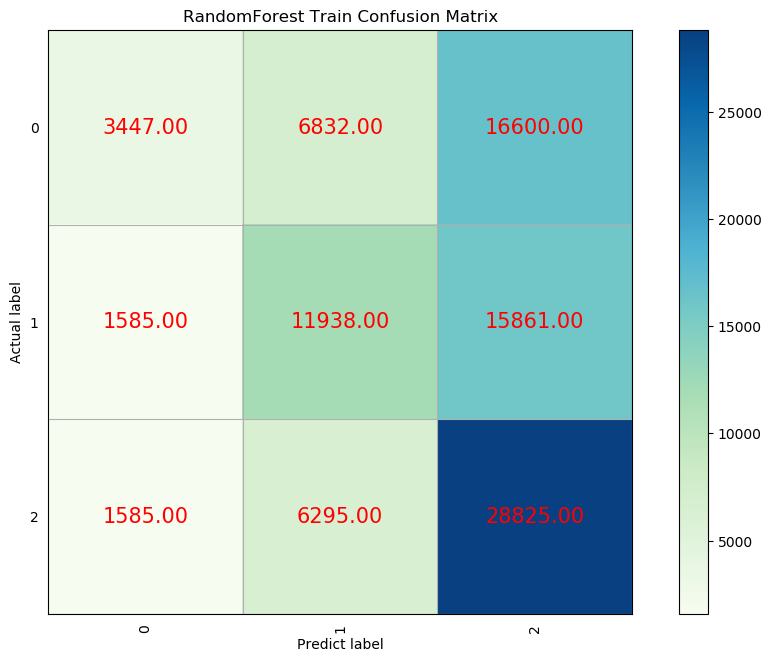

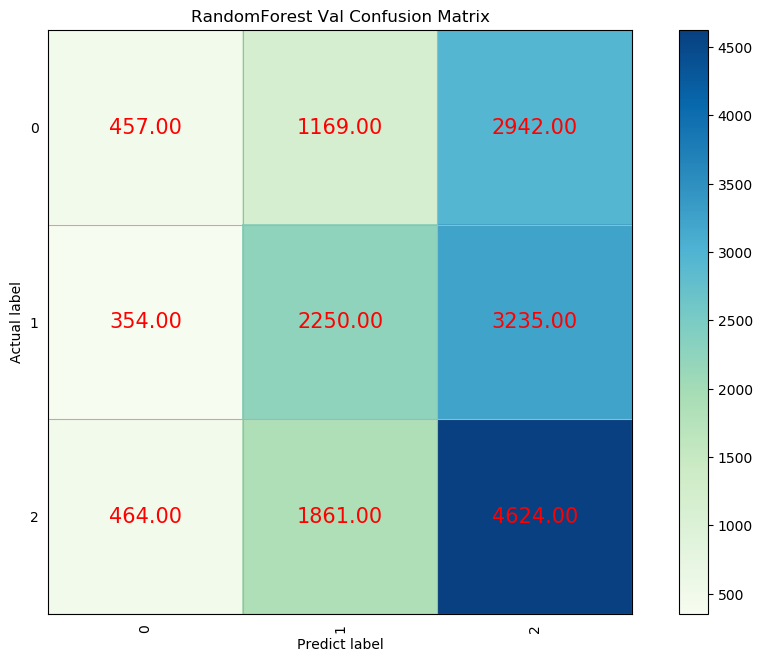

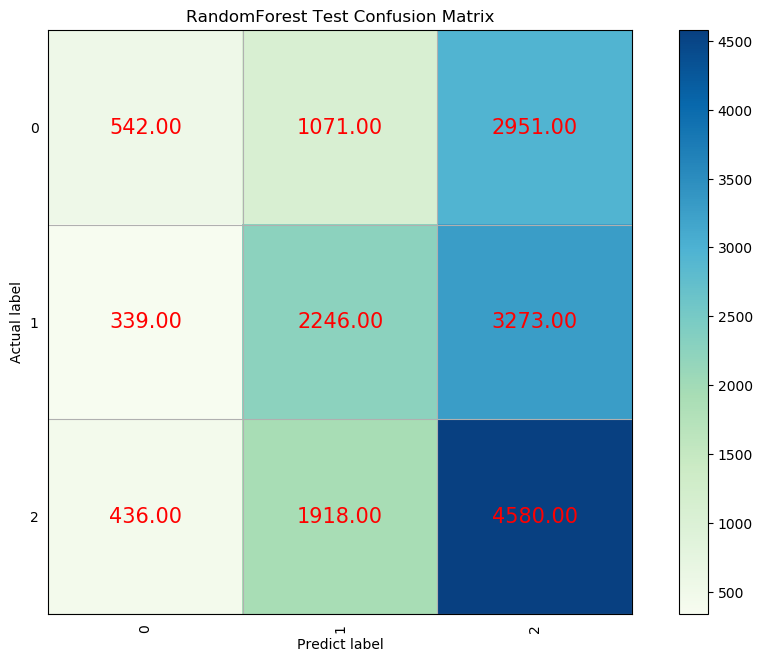

RandomForest train_acc 0.4755399707426211
RandomForest val_acc 0.4223899516017516
RandomForest test_acc 0.42452177921179995


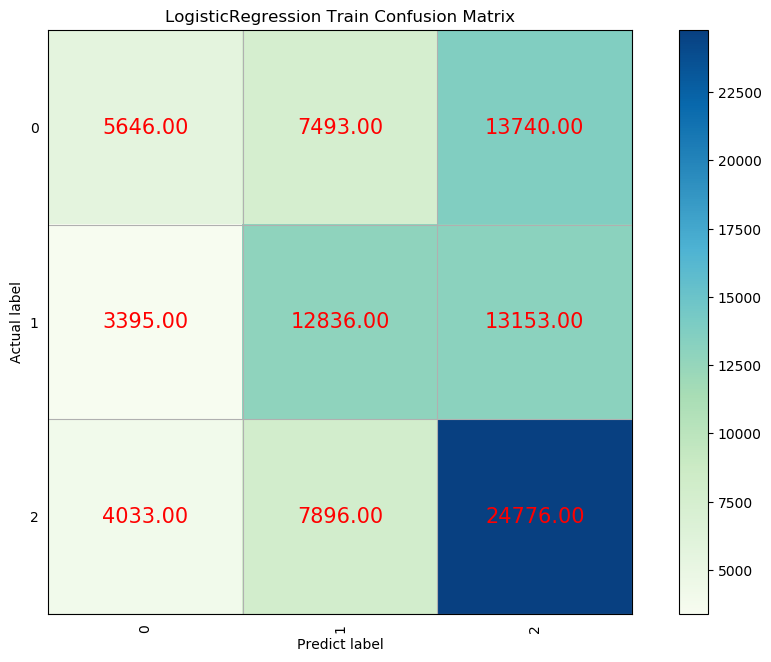

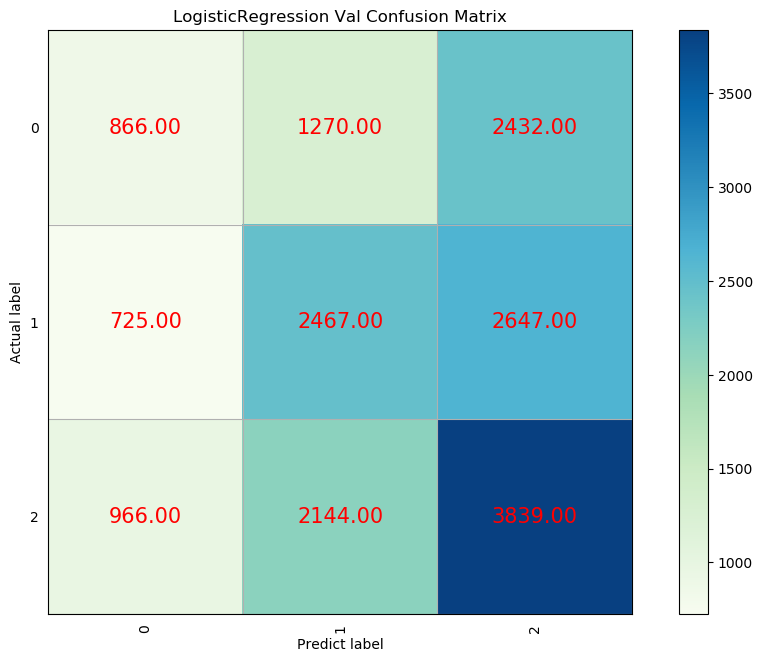

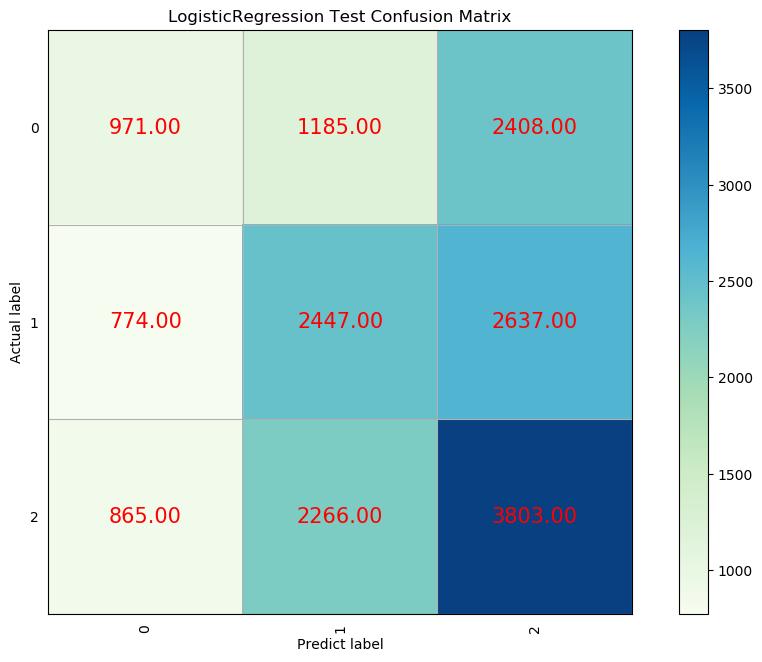

LogisticRegression train_acc 0.46529988813355133
LogisticRegression val_acc 0.4132288545747868
LogisticRegression test_acc 0.4160520857340401


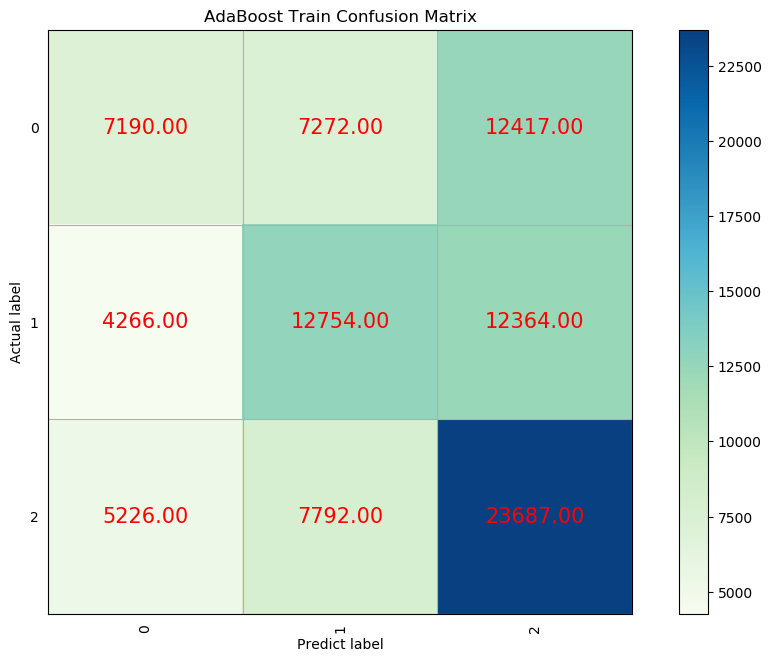

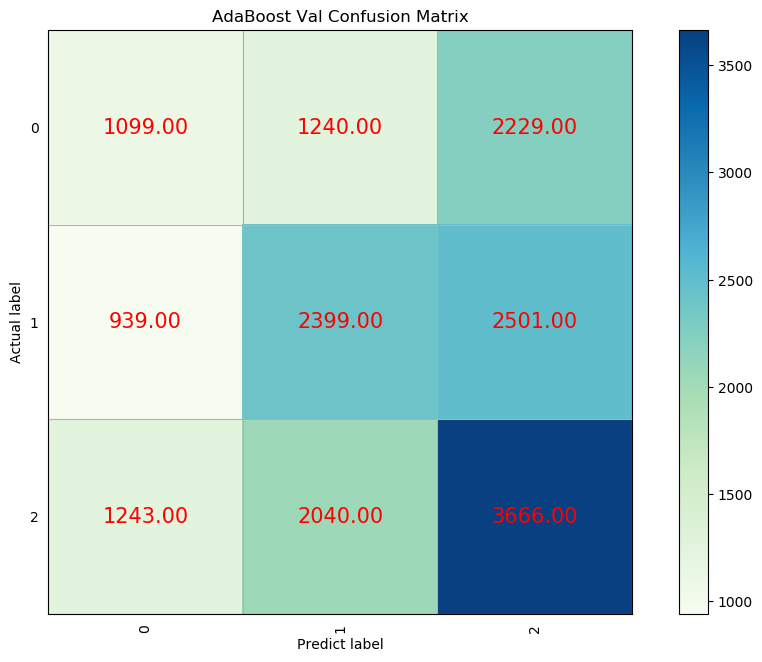

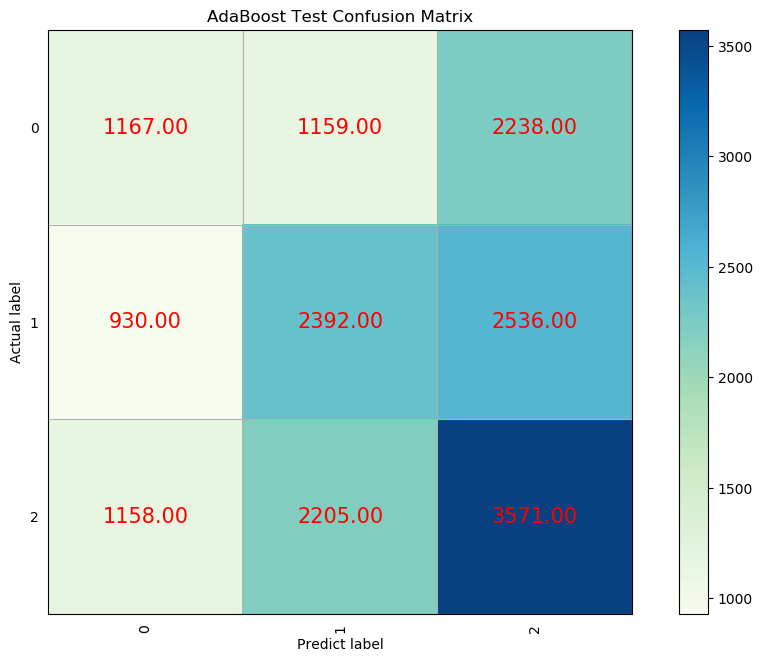

AdaBoost train_acc 0.46931202134067634
AdaBoost val_acc 0.4127679188753169
AdaBoost test_acc 0.4108089421525697


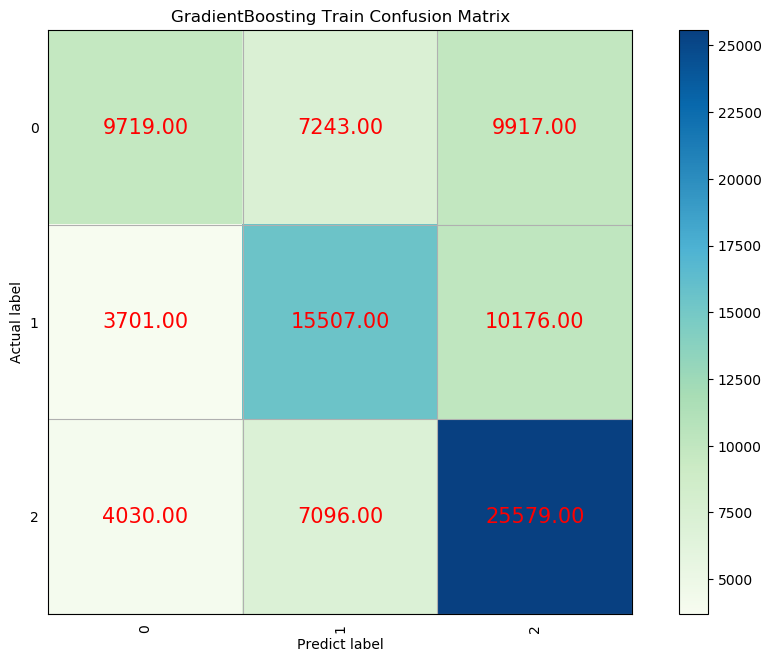

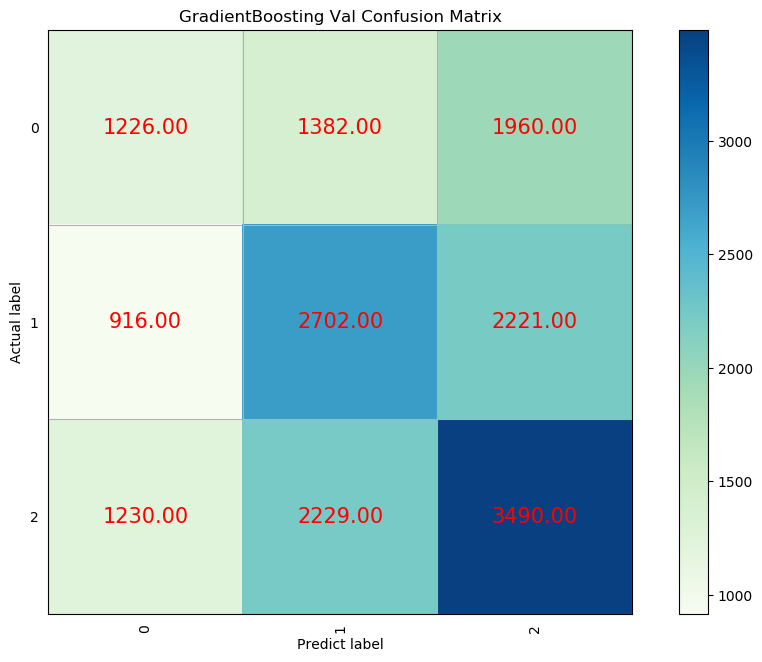

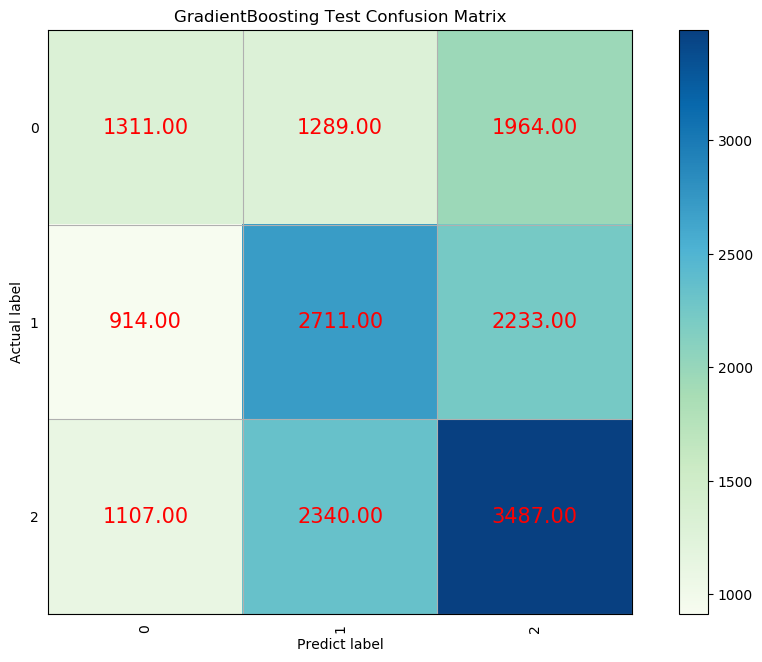

GradientBoosting train_acc 0.546478358144738
GradientBoosting val_acc 0.427402627333487
GradientBoosting test_acc 0.4326457709149574


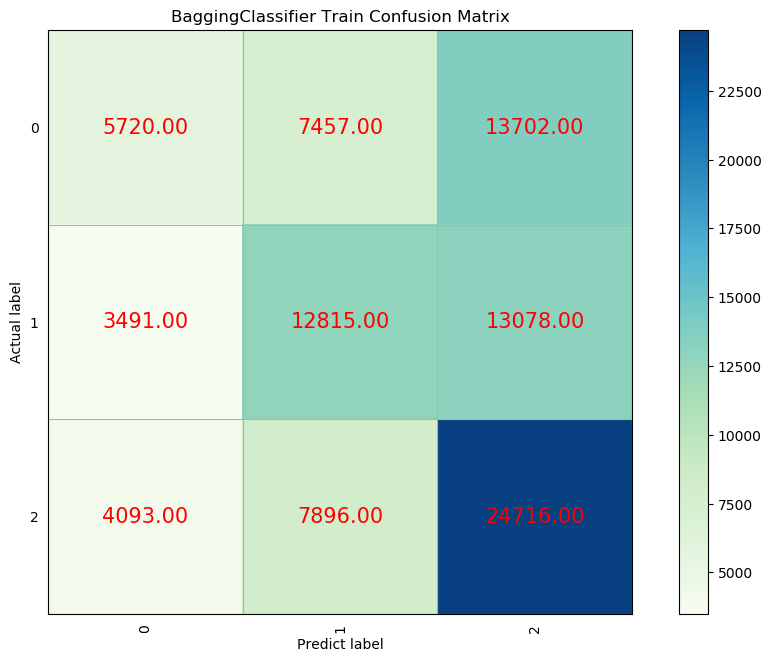

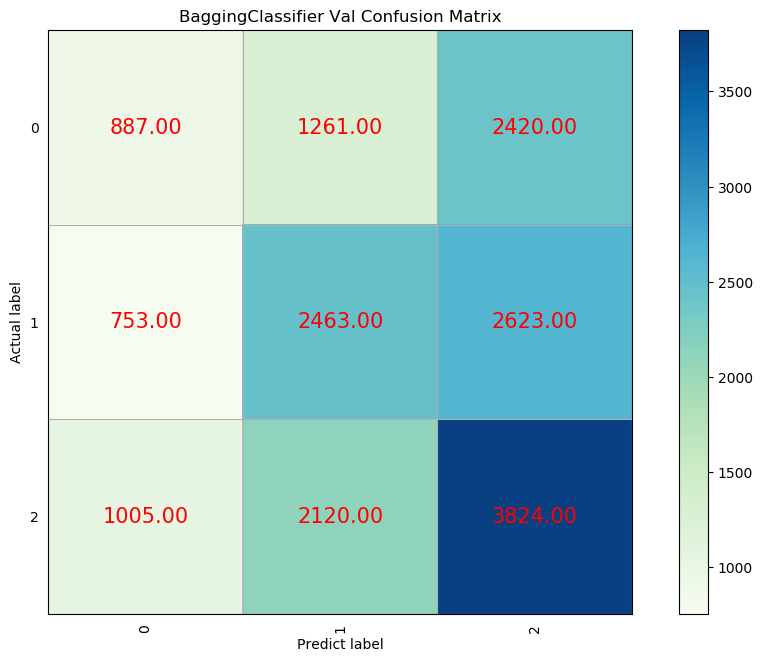

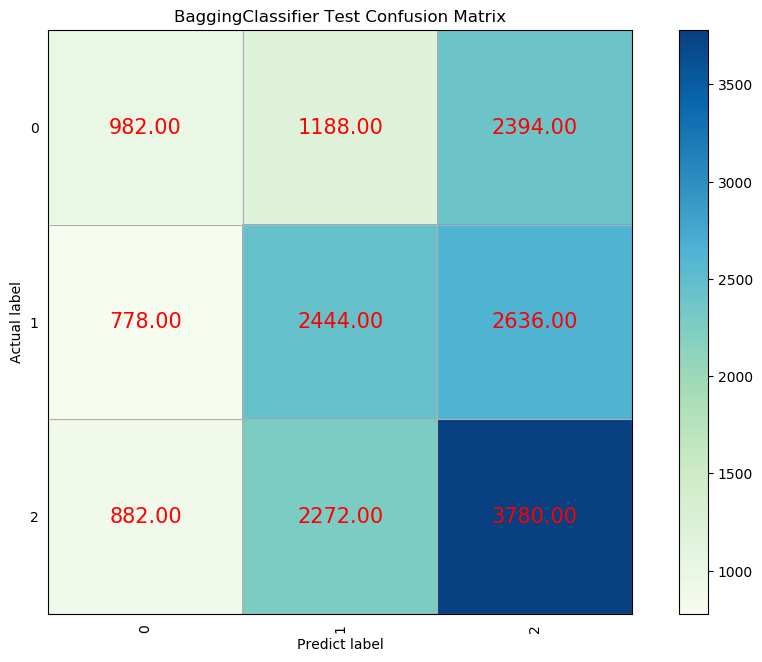

BaggingClassifier train_acc 0.46522459340848465
BaggingClassifier val_acc 0.4133440884996543
BaggingClassifier test_acc 0.415187831297534


In [16]:
from sklearn.metrics import roc_auc_score,accuracy_score


#https://zhuanlan.zhihu.com/p/73558315
def plot_confusion_matrix(cm, mark=''):
    title = "%s Confusion Matrix"%(mark)
    classes = list(range(3))
    plt.figure(figsize=(12, 8), dpi=100)
    np.set_printoptions(precision=3)

    # 在混淆矩阵中每格的概率值
    ind_array = np.arange(len(classes))
    x, y = np.meshgrid(ind_array, ind_array)
    for x_val, y_val in zip(x.flatten(), y.flatten()):
        c = cm[y_val][x_val]
        if c > 0.001:
            plt.text(x_val, y_val, "%0.2f" % (c,), color='red', fontsize=15, va='center', ha='center')
    
 
    plt.imshow(cm, interpolation='nearest',cmap=plt.cm.GnBu
#                cmap=plt.cm.binary
              )
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(classes)))
    plt.xticks(xlocations, classes, rotation=90)
    plt.yticks(xlocations, classes)
    plt.ylabel('Actual label')
    plt.xlabel('Predict label')
    
    # offset the tick
    tick_marks = np.array(range(len(classes))) + 0.5
    plt.gca().set_xticks(tick_marks, minor=True)
    plt.gca().set_yticks(tick_marks, minor=True)
    plt.gca().xaxis.set_ticks_position('none')
    plt.gca().yaxis.set_ticks_position('none')
    plt.grid(True, which='minor', linestyle='-')
    plt.gcf().subplots_adjust(bottom=0.15)
    
    plt.show()
    



def get_metric_acc(model,x,y,mark):
    pre_y = model.predict(x)
    acc = accuracy_score(y,pre_y)
    
    
    cm = confusion_matrix(y, pre_y)
    
    plot_confusion_matrix(cm,mark)
    

    return acc




def model_metric(model,mark):

    train_acc = get_metric_acc(model,train_x_pca,train_y,'%s Train'%(mark))

    val_acc = get_metric_acc(model,val_x_pca,val_y,'%s Val'%(mark))

    test_acc = get_metric_acc(model,test_x_pca,test_y,'%s Test'%(mark))


    print("%s train_acc"%(mark),train_acc)
    print("%s val_acc"%(mark),val_acc)
    print("%s test_acc"%(mark),test_acc)
    
    
    
    
    
    

    

    

    
    
    
model_metric(clf_rf,'RandomForest')  
    
model_metric(clf_lr,'LogisticRegression') 

model_metric(clf_ada,'AdaBoost')

model_metric(clf_gbdt,'GradientBoosting')

model_metric(clf_gb_lr,'BaggingClassifier')

# model_metric(clf_svc,'SVM') 